# MIT License

All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright(c) 2023 Kumar Mehul

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Abstract

In this dataset, we have a multitude of predictor variables like ram, battery_power, and many more, and we are trying to predict the price range of the mobile phone, which is the target variable, based on the predictor variables. 

Our Dataset has 2000 rows, with no nulls, so we do not need to perform any kind of preprocessing on the data.

# Aim of the notebook

We are going to explain the concept of SHAP Analysis, do some visualizations and interpret them.

# Feature Description

1. battery_power: This denotes the battery power of the mobile

2. blue: This tels if the mobile has bluetooth or not

3. clock_speed: This denotes the clock speed of the mobile

4. dual_sim: This tells if the mobile has dual sim or not

5. fc: This denotes the front camera capacity of the mobile

6. four_g: This tells if the mobile has 4G or not

7. int_memory: This denotes the internal memory capacity of the mobile

8. m_dep: This denotes the mobile depth

9. mobile_wt: This denotes the mobile weight

10. n_cores: This denotes the number of cores the mobile has

11. pc: This denotes the primary camera capacity of the mobile

12. px_height: This denotes the pixel height in the mobile

13. px_width: This denotes the pixel width in the mobile

14. ram: This denotes the ram capacity of the mobile

15. sc_h: This denotes the screen height

16. sc_w: This denotes the screen width

17. talk_time: This denotes the talk time of the mobile

18. three_g: This tells if the mobile has 3G or not

19. touch_screen: This tells if the mobile has touch screen or not

20. wifi: This tells if the mobile has wifi or not

21. price_range: This is the target variable, depending on all the other variables, it tells the price range of the mobile either in 0, 1, 2, or 3

# What is SHAP Analysis?

SHAP analysis (SHapley Additive exPlanations) is a powerful and unified approach for evaluating machine learning model output. It is based on the Shapley values concept, which comes from cooperative game theory. SHAP analysis provides a simple and understandable method for explaining individual predictions and assigning feature value to each input feature.

Shapley values, introduced by Lloyd Shapley in 1953, are used to fairly distribute the value of a cooperative game among its players. In machine learning, the "game" is the prediction task, the "players" are the input features, and the "value" is the prediction output. The Shapley value for a feature i is defined as:

φ_i(f) = ∑[v(S ∪ {i}) - v(S)] * [C(|S|, |N|-|S|-1)] / C(|N|-1)

where:

f is the machine learning model

φ_i(f) is the Shapley value for feature i

v(S) is the value (prediction) of the model for the subset of features S

S is a subset of features excluding feature i

N is the set of all input features

C(a, b) is the binomial coefficient (combination), given by C(a, b) = a! / (b!(a-b)!)

# Desirable Properties of SHAP Values

* Efficiency: The sum of Shapley values for all features equals 
the difference between the prediction for the given instance and the average prediction for all instances.

* Symmetry: If two features contribute equally to all possible feature combinations, they should have the same Shapley value.

* Dummy: If a feature does not contribute to the prediction, its Shapley value should be zero.

* Additivity: For any two models, the Shapley value of their sum is the sum of their individual Shapley values.

# Visualizations of SHAP Analysis

Visualization of SHAP Analysis can be done with the help of a number of plots. In this notebook, we will use SHAP Summary Plot, Dependence Plot, and Force Plot.

* SHAP Summary Plot: The plot displays each feature as a horizontal bar, with the length of the bar representing the magnitude of the feature's contribution to the final prediction. The color of the bar indicates the direction of the effect of the feature on the prediction: red for positive effects and blue for negative effects.

  The plot can be used to identify the most important features in the model and to understand the direction of their effect on the prediction.

* Dependence Plot: A dependence plot shows the relationship between a predictor variable and the predicted outcome of the model while taking into account the values of other predictor variables. The plot displays the values of the predictor variable on the x-axis and the corresponding predicted outcome on the y-axis. Each point on the plot represents a single observation from the dataset, and the color of the point represents the value of another predictor variable that might affect the relationship between the predictor variable and the outcome.

  The plot can help us understand how the predictor variable affects the model's prediction and whether there is any interaction between the predictor variable and other variables in the model.

* Force Plot: A force plot is a visual representation of the SHAP values calculated for a given instance and its predictor variables. The plot displays how each predictor variable contributes to the final output value for the given instance. The SHAP values are represented as bars, with each bar's length indicating the magnitude and direction of the corresponding predictor variable's effect on the output.

  At the top of the force plot, there is a base value, which represents the expected output value when all predictor variables are at their baseline values. The SHAP values for each variable are added and subtracted from the base value to arrive at the actual output value for the given instance.

  Each bar in the force plot represents a predictor variable and is color-coded to indicate the direction of the variable's effect on the output. If the bar is blue, the variable has a negative effect on the output, and if the bar is red, the variable has a positive effect on the output. The longer the bar, the greater the effect of the corresponding variable on the output.

# Types of SHAP Analysis

There are several types of SHAP, each designed for a specific class of machine learning models or to optimize computational efficiency.

* Tree SHAP: Tree SHAP is specifically designed for tree-based models such as decision trees, random forests, and gradient-boosted trees. It is more efficient than Kernel SHAP for tree-based models and provides accurate and consistent explanations. The algorithm calculates the contribution of each split as it traverses the tree from the root to the leaves. Then, it calculates the Shapley values for each feature using a dynamic programming algorithm that takes advantage of the tree structure.

* Linear SHAP: Linear SHAP is designed for linear models, such as linear regression and logistic regression. Since linear models have an inherently interpretable structure, computing Shapley values for these models is straightforward. In linear models, the coefficients represent the average contribution of each feature to the prediction across all instances. Linear SHAP assigns the contribution of each feature to a specific instance as the product of the feature value and the corresponding model coefficient.

# Tree SHAP

Tree SHAP is an approximation method for computing Shapley values, specifically designed for tree-based models such as decision trees, random forests, and gradient-boosted trees. 


The Tree SHAP algorithm can be summarized as follows:

* For a given instance, traverse the tree-based model from the root to the leaves, calculating the contribution of each split to the final prediction.

* Calculate the Shapley values for each feature using a dynamic programming algorithm that takes advantage of the tree structure.

For a given tree model T and an instance x, let R(x, T) be the prediction path from the root to a leaf in the tree T for the instance x. Let v(S) be the value function that takes a subset of features S and returns the expected value of the prediction when the features in S are known, and the remaining features are unknown. The Shapley value for feature i is:

φ_i(x) = Σ (|S|!(M-|S|-1)!/M!) [v(S ∪ {i}) - v(S)]

Here, the summation is taken over all possible feature subsets S that do not contain feature i, M is the total number of features, and |S| is the cardinality of the subset S. The dynamic programming algorithm efficiently computes these Shapley values using the tree structure.

# Implementation of Tree SHAP

**Loading and Processing the Dataset**

In [ ]:
!pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap

# Load the dataset
url = "https://raw.githubusercontent.com/kmehul/Data-Science/main/Datasets/train.csv"
tree_data = pd.read_csv(url)
X, y = tree_data.drop("price_range", axis=1), tree_data["price_range"]

# Preprocess the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training a RandomForestClassifier**

In [ ]:
tree_model = RandomForestClassifier(n_estimators=100, random_state=42)
tree_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Checking the most important features for our Dataset**

In [ ]:
# Get the feature importances from the classifier
importances = tree_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a list of feature names
feature_names = list(X.columns)

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

Feature ranking:
1. feature 13 (0.470962): ram
2. feature 0 (0.074796): battery_power
3. feature 11 (0.058538): px_height
4. feature 12 (0.056722): px_width
5. feature 8 (0.041434): mobile_wt
6. feature 6 (0.037928): int_memory
7. feature 16 (0.032441): talk_time
8. feature 10 (0.030745): pc
9. feature 2 (0.029058): clock_speed
10. feature 14 (0.028447): sc_h
11. feature 15 (0.028134): sc_w
12. feature 4 (0.024514): fc
13. feature 7 (0.024134): m_dep
14. feature 9 (0.023978): n_cores
15. feature 17 (0.006841): three_g
16. feature 1 (0.006595): blue
17. feature 3 (0.006430): dual_sim
18. feature 18 (0.006352): touch_screen
19. feature 19 (0.006318): wifi
20. feature 5 (0.005634): four_g


We will do the shap analysis for the top 5 most important predictor variables in our Dataset.

**Implementing Tree SHAP using the SHAP library**

In [ ]:
# Create a Tree SHAP explainer and compute SHAP values for the test set
explainer = shap.Explainer(tree_model)
tree_shap_values = explainer(X_test)

**Visualizing the results using SHAP plots**

SHAP Summary Plot

SHAP values array shape: (400, 20, 4)
SHAP values for class 0:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


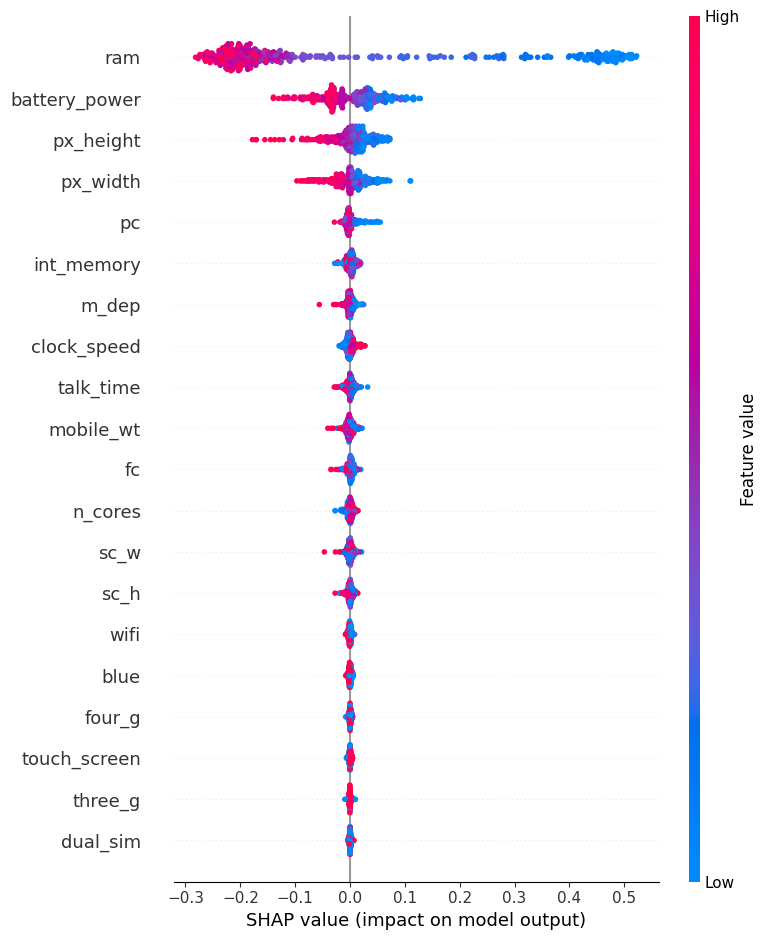

SHAP values for class 1:


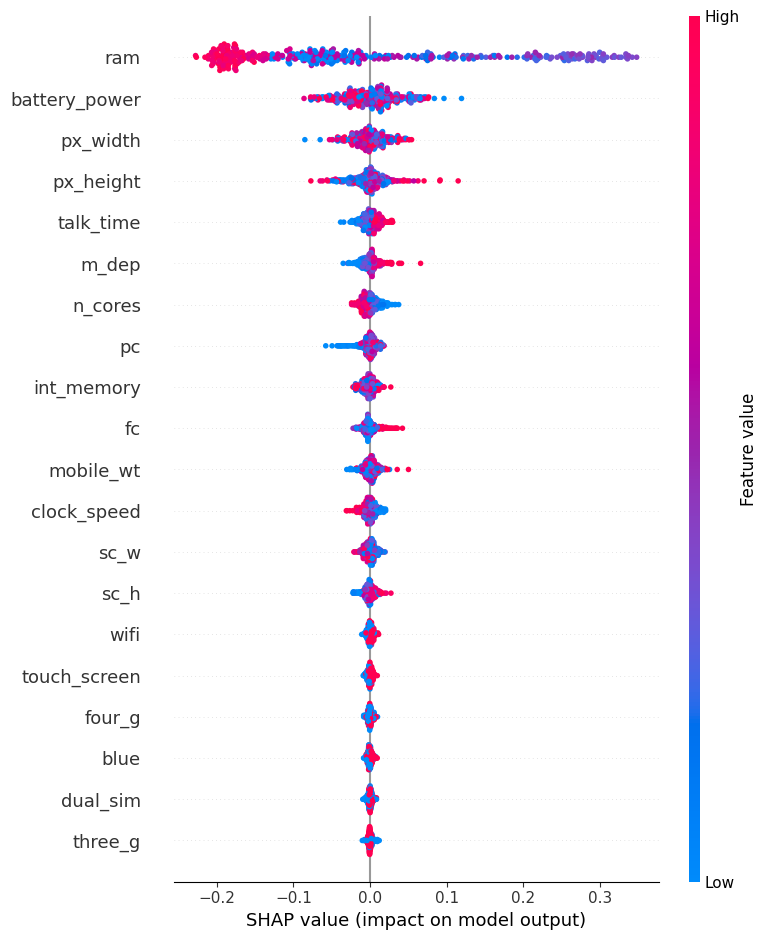

SHAP values for class 2:


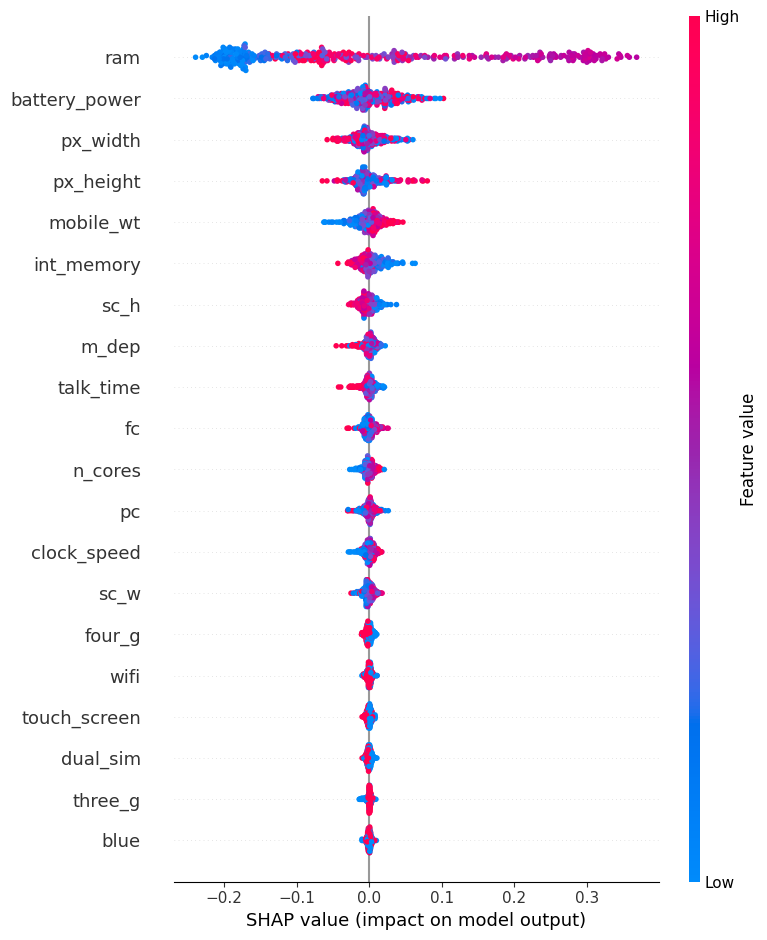

SHAP values for class 3:


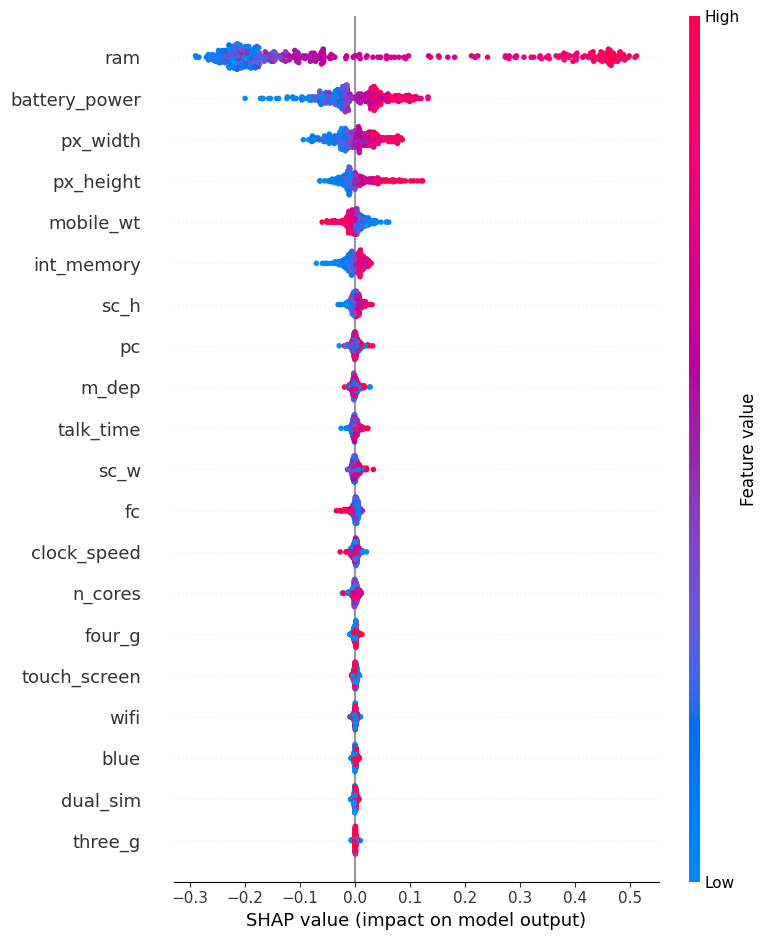

In [ ]:
shap_values_array = tree_shap_values.values

print("SHAP values array shape:", shap_values_array.shape)

# Plot the SHAP values for each class
num_classes = shap_values_array.shape[2]
for class_index in range(num_classes):
    shap_values_class = shap_values_array[:, :, class_index]
    print(f"SHAP values for class {class_index}:")
    shap.summary_plot(shap_values_class, X_test)


The interpretation for the above SHAP Summary Plot is as follows: 

* For Target class 0: The top predictor variables are showing a trend of high negative shap impact with their higher values, which means that them havig higher values decreases the probability of this class, and vice versa.

* For Target class 1: The most important predictor variable, ram is still showing high negative shap impact for this target class as well, which means that its higher value will decrease the lielihood of occurence of this class. Some lower importance predictor variable are showing a mix of high and low impact with their high and low values, which means the likelihood of this target class will depend on some other relations and other variables.

* For Target class 2: For target class 2, the top important predictor variables are showing a little positive shap impact in the model, which means that their increasing value will increase the likelihood of the occurence of this class.

* For Target class 3: For class 3, the important variables, other than mobile_wt are showing a strong positive shap impact on the model, which means that their higher value will definitely increase the probablility of this class, but inversely for mobile_wt.

Dependence Plot

Dependence plot for class 0, feature: ram


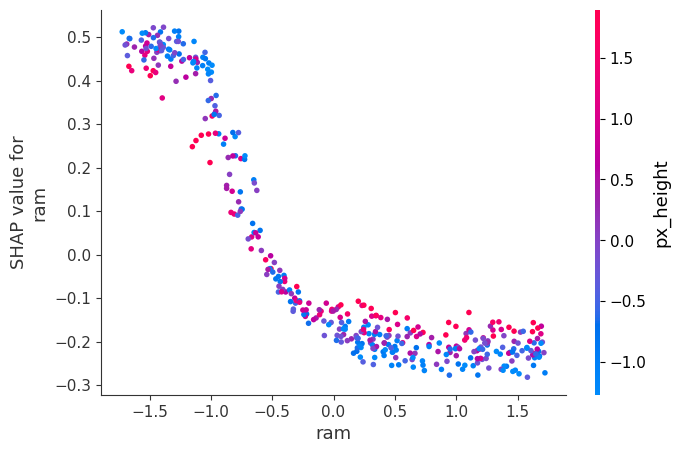

Dependence plot for class 0, feature: battery_power


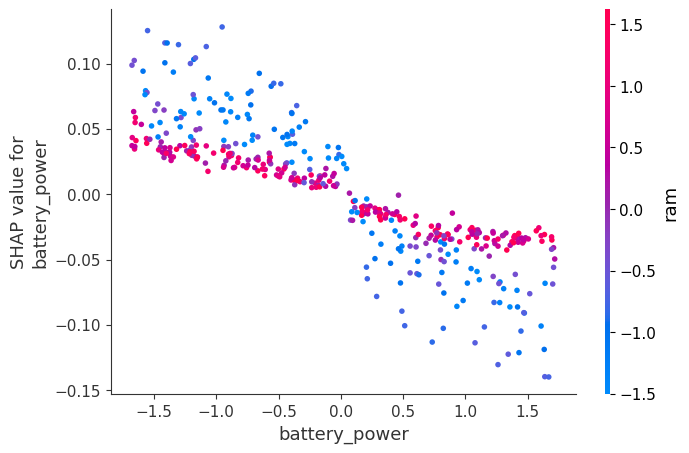

Dependence plot for class 0, feature: px_height


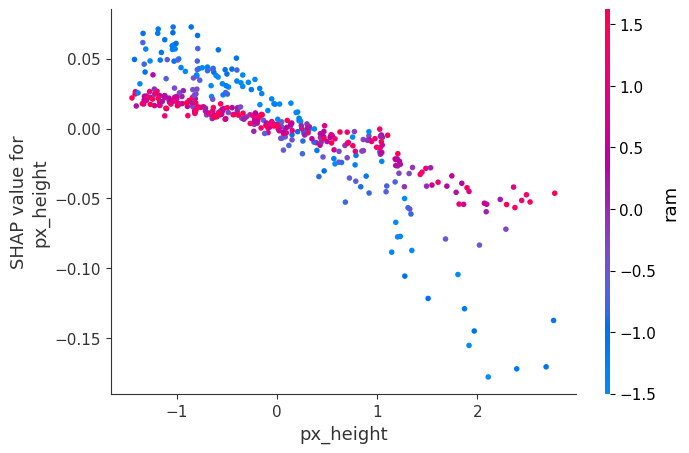

Dependence plot for class 0, feature: px_width


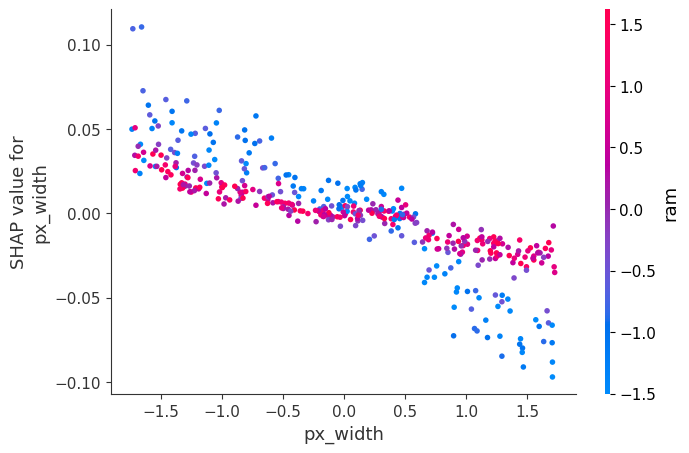

Dependence plot for class 0, feature: mobile_wt


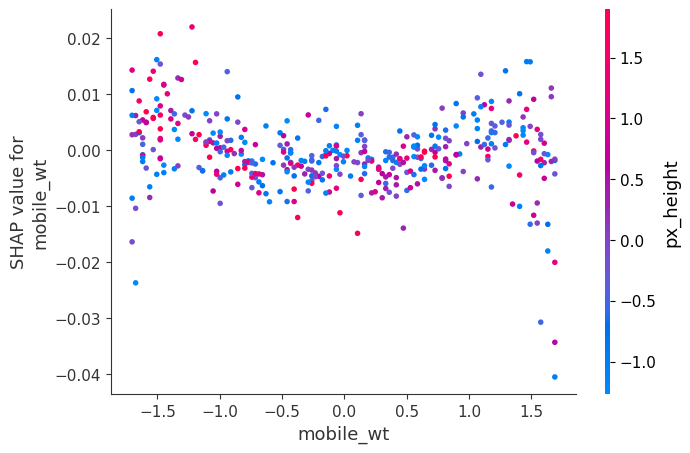

Dependence plot for class 1, feature: ram


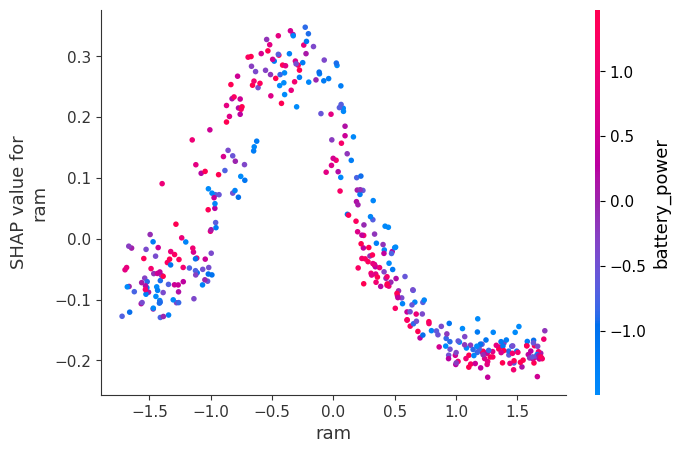

Dependence plot for class 1, feature: battery_power


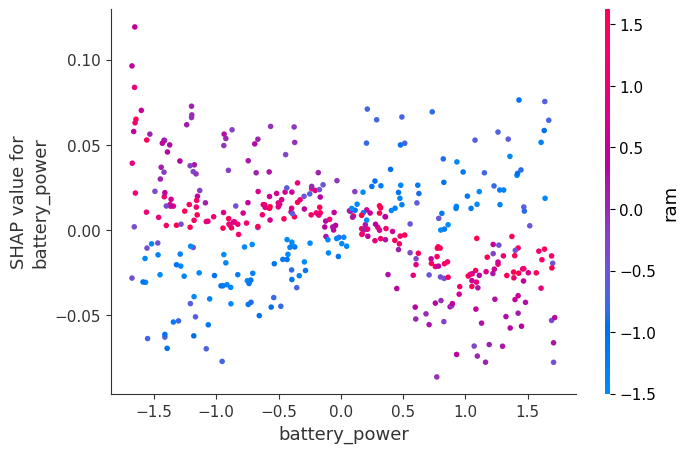

Dependence plot for class 1, feature: px_height


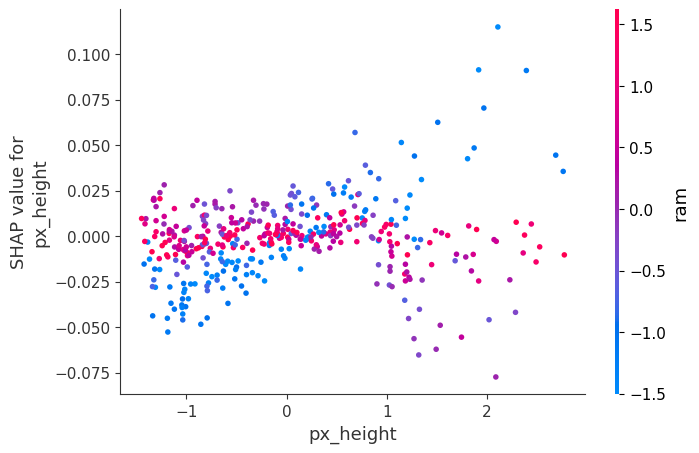

Dependence plot for class 1, feature: px_width


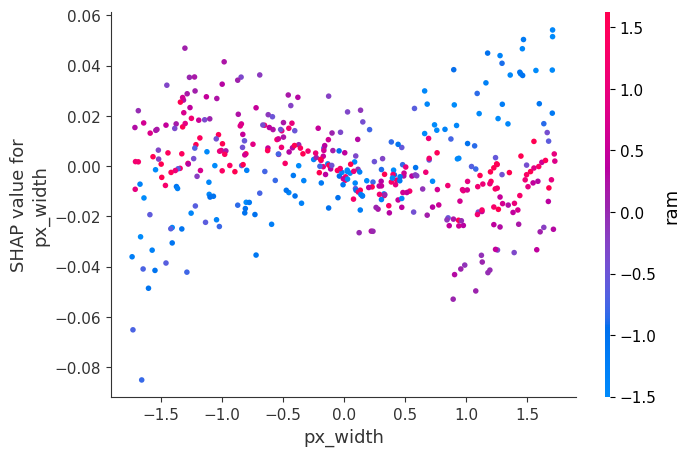

Dependence plot for class 1, feature: mobile_wt


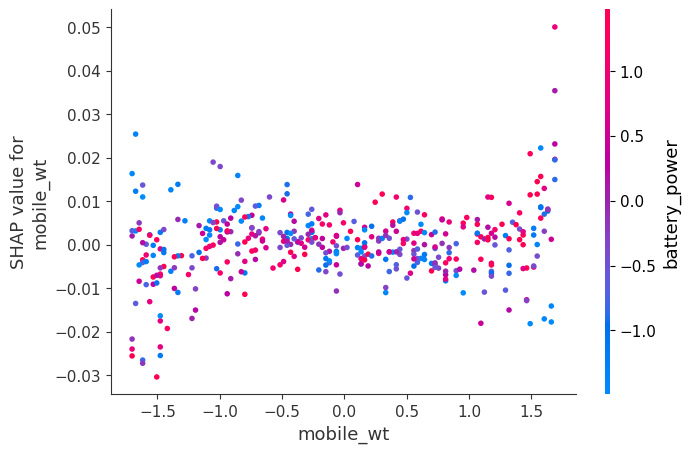

Dependence plot for class 2, feature: ram


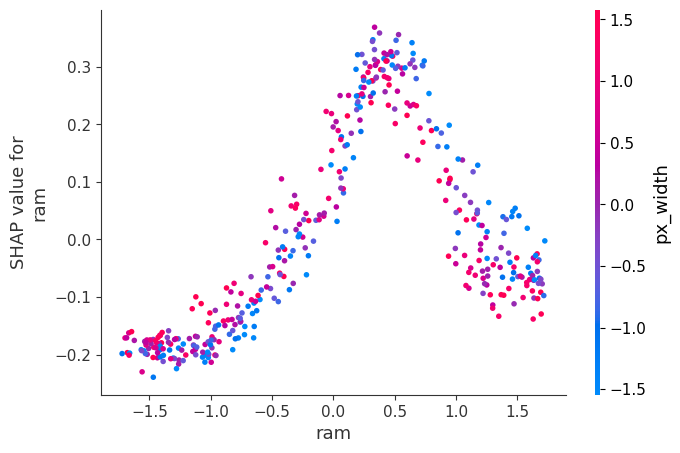

Dependence plot for class 2, feature: battery_power


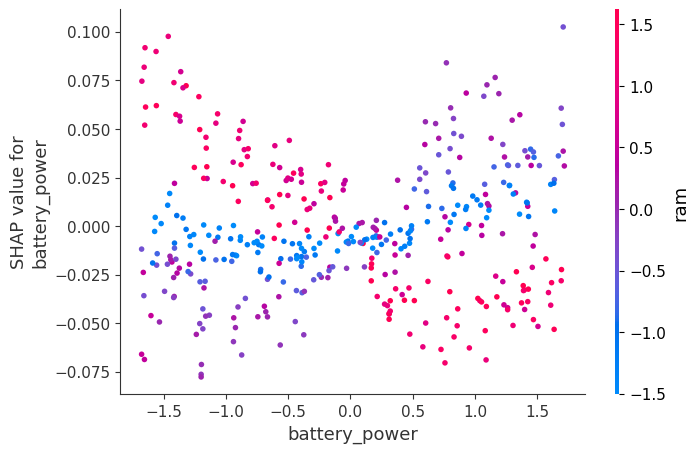

Dependence plot for class 2, feature: px_height


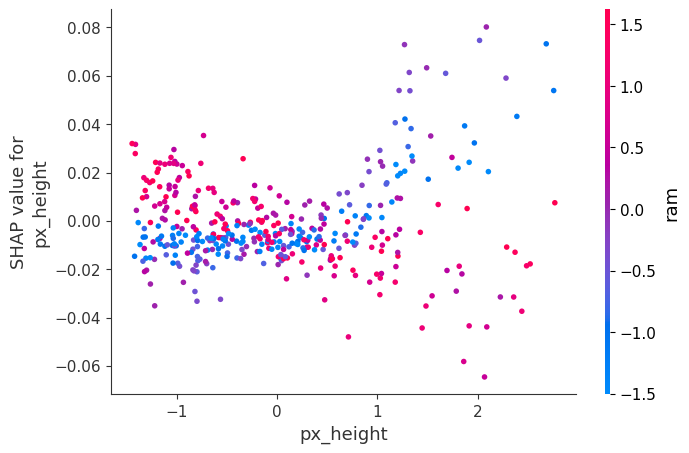

Dependence plot for class 2, feature: px_width


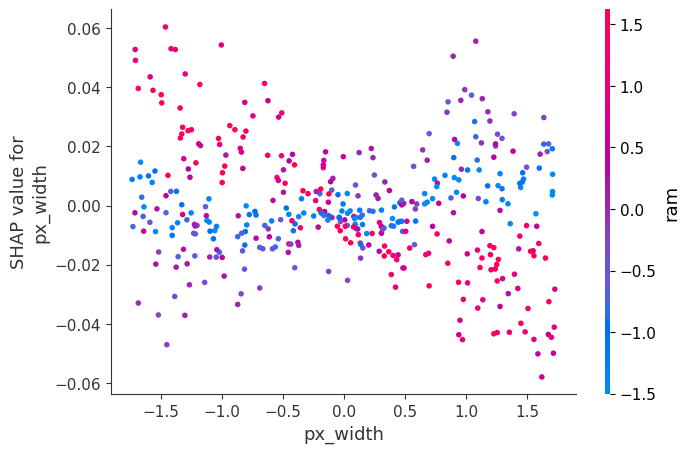

Dependence plot for class 2, feature: mobile_wt


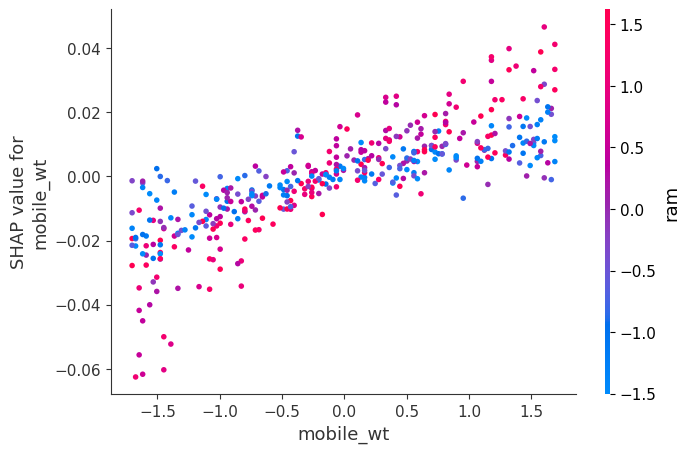

Dependence plot for class 3, feature: ram


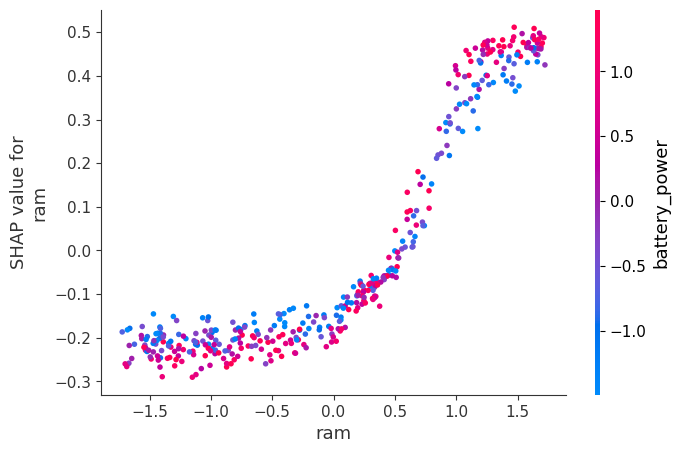

Dependence plot for class 3, feature: battery_power


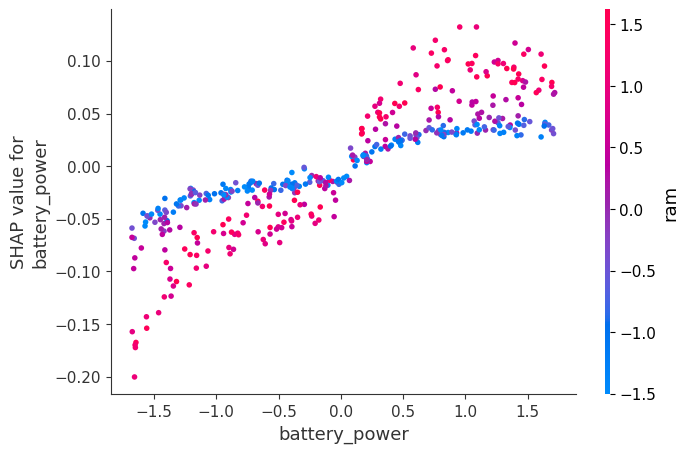

Dependence plot for class 3, feature: px_height


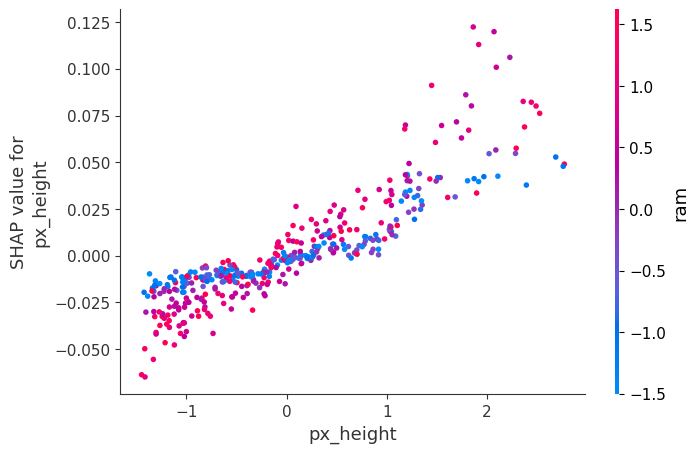

Dependence plot for class 3, feature: px_width


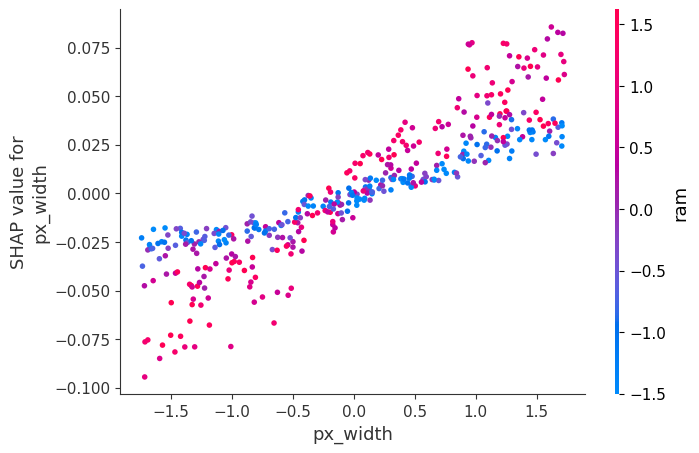

Dependence plot for class 3, feature: mobile_wt


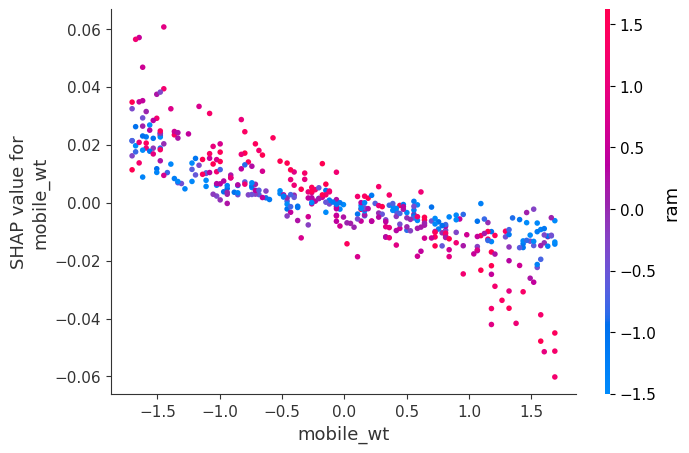

In [ ]:
# Plot the SHAP dependence plots for each class
feature_names = ["ram", "battery_power", "px_height", "px_width", "mobile_wt"]
for class_index in range(num_classes):
    shap_values_class = shap_values_array[:, :, class_index]
    for feature_name in feature_names:
        print(f"Dependence plot for class {class_index}, feature: {feature_name}")
        shap.dependence_plot(feature_name, shap_values_class, X_test)


For Tree Model based Dependence Plot. On the basis of the graph, we can see the interaction between the variables and the impact of their relationship on the target variable.

The following interpretations can be made from the above deoendence plot:

* For Target class 0: All the relationships are mostly inversely proportional, other than mobile_wt and px_height, which depicts that the relationship of these two has mostly no effect on the outcome of the target variable.

* For Target class 1: Other than the relationship between ram and battery_power, the other relationships have almost no effect on the outcome of the target variable, as they have mostly slat slope. In the relationship of ram and battery_power, we can see that the relationship goes proportional towards the middle, after that, the relationship goes inversely proportional. Which means that the class 1 outcome likelihood is higher until the ram value reaches its midpoint, after which, the increase in the ram value decreases the likelihood of this class.

* For Target class 2: In this class, the relationship between mobile_wt and ram is propotional, which means that it increases the likelihood of this class. The relationship between ram and px_width is almost similar as in class 1 of the target variable. All the other relationships have a flat slope, meaning the relationship has no effect on the outcome of the target class.

* For Target Class 3: In this class, the only relationship which is inversely proportional is mobile_wt and ram, which means it decreases the probability of this class. All the other relationships are proportional.

Force Plot

Force plot for class 0, instance 335:


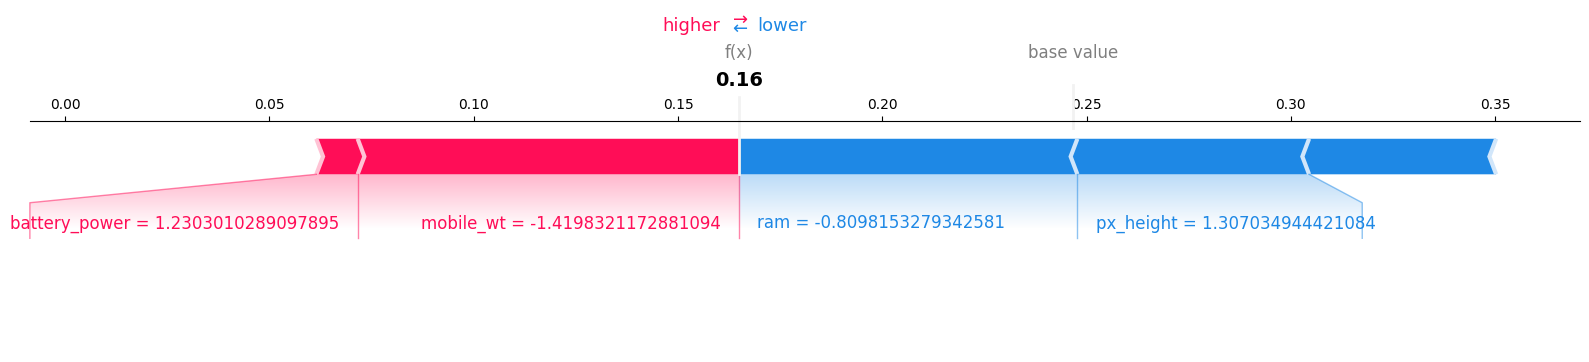

Force plot for class 0, instance 93:


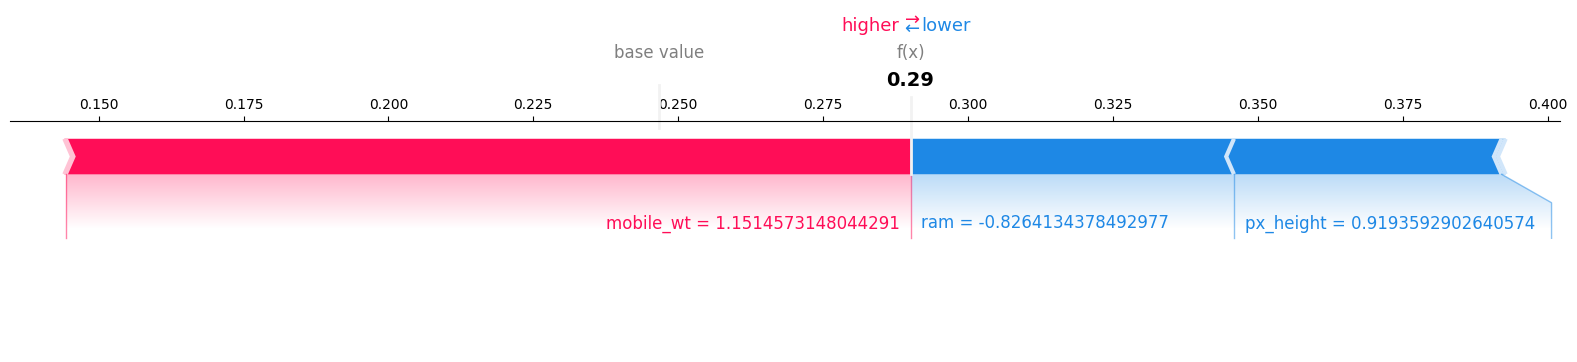

Force plot for class 0, instance 382:


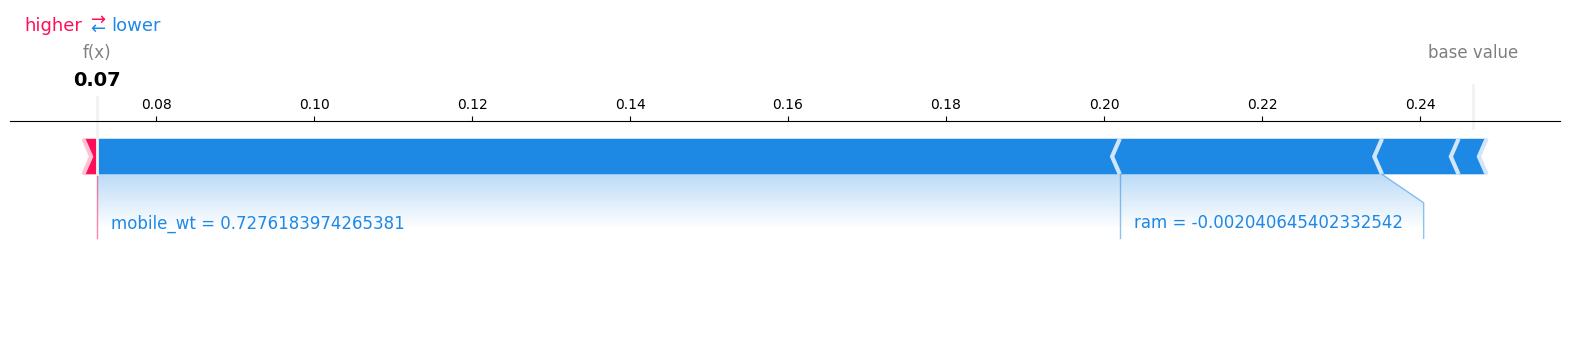

Force plot for class 0, instance 305:


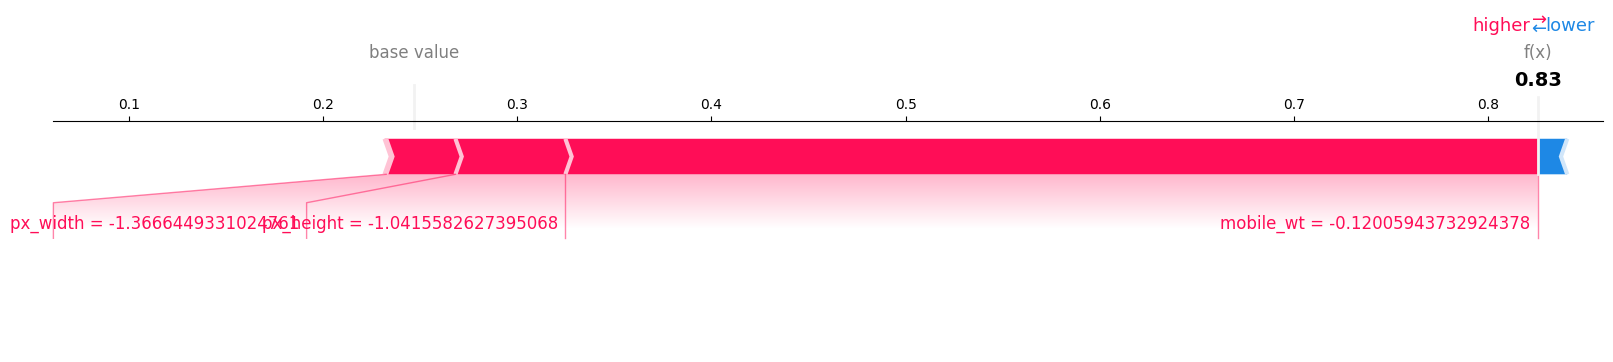

Force plot for class 0, instance 331:


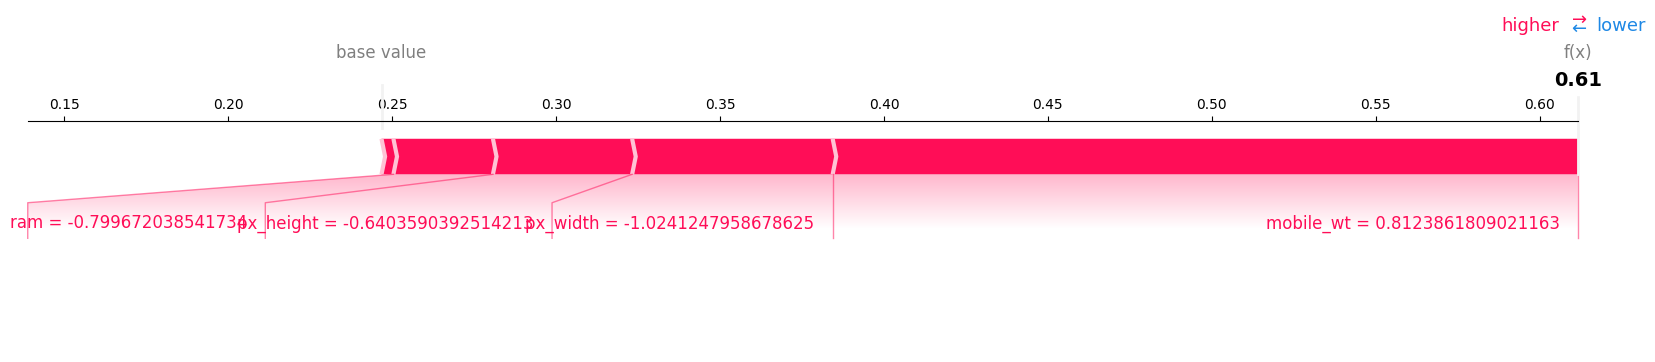

Force plot for class 1, instance 335:


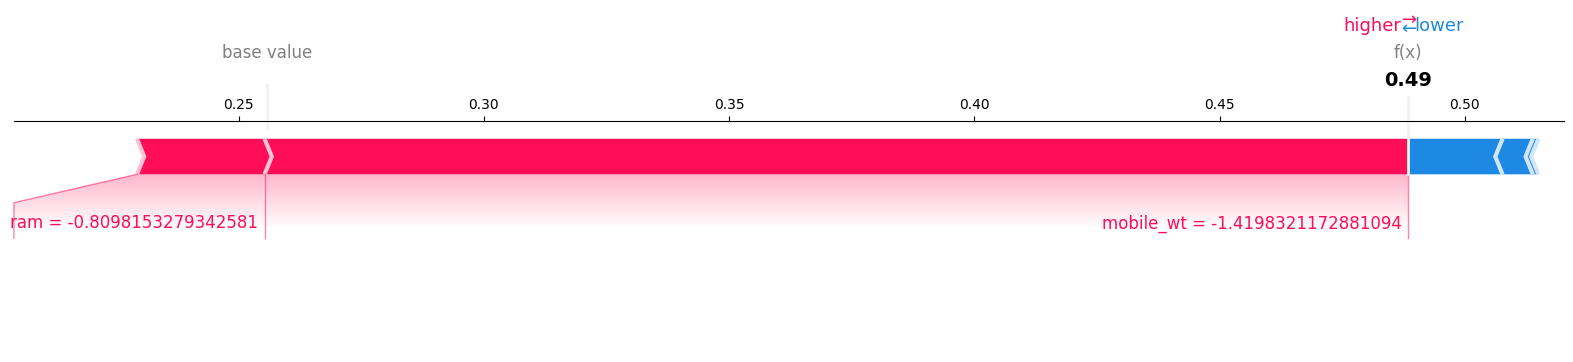

Force plot for class 1, instance 93:


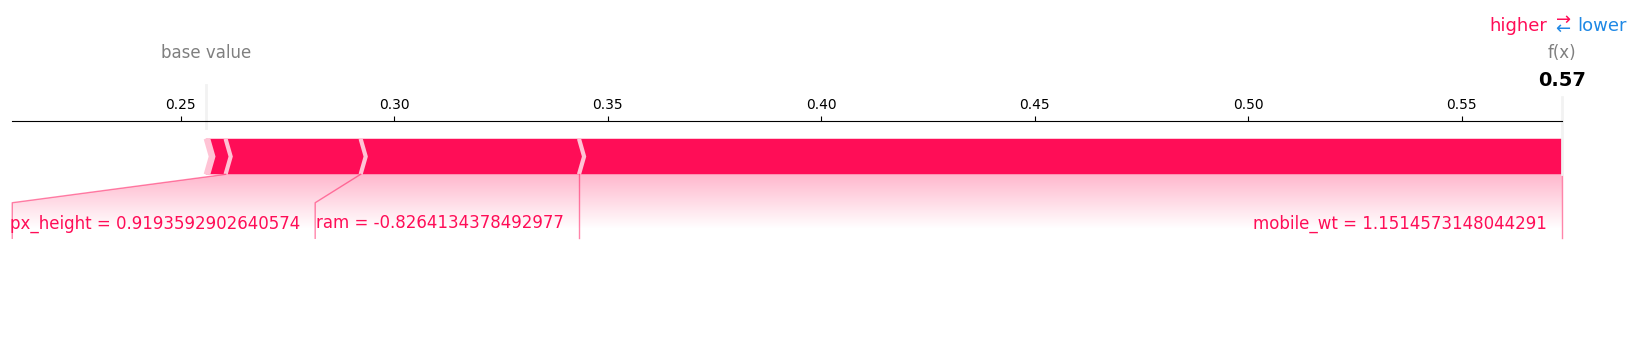

Force plot for class 1, instance 382:


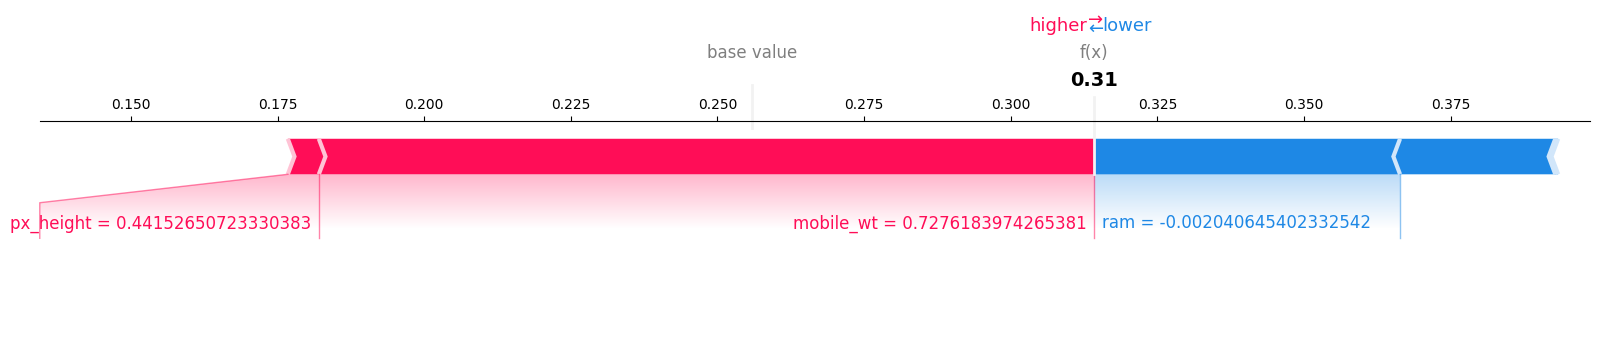

Force plot for class 1, instance 305:


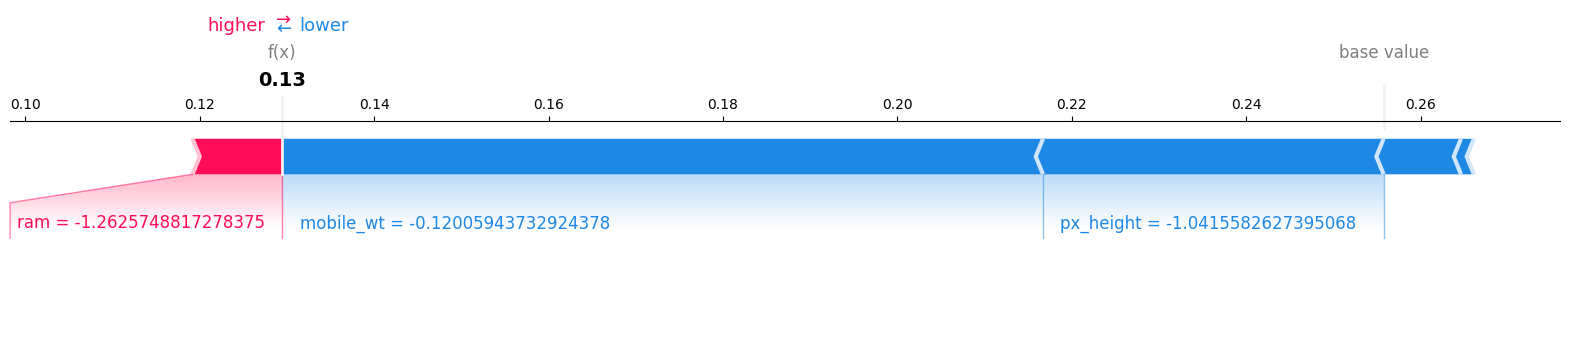

Force plot for class 1, instance 331:


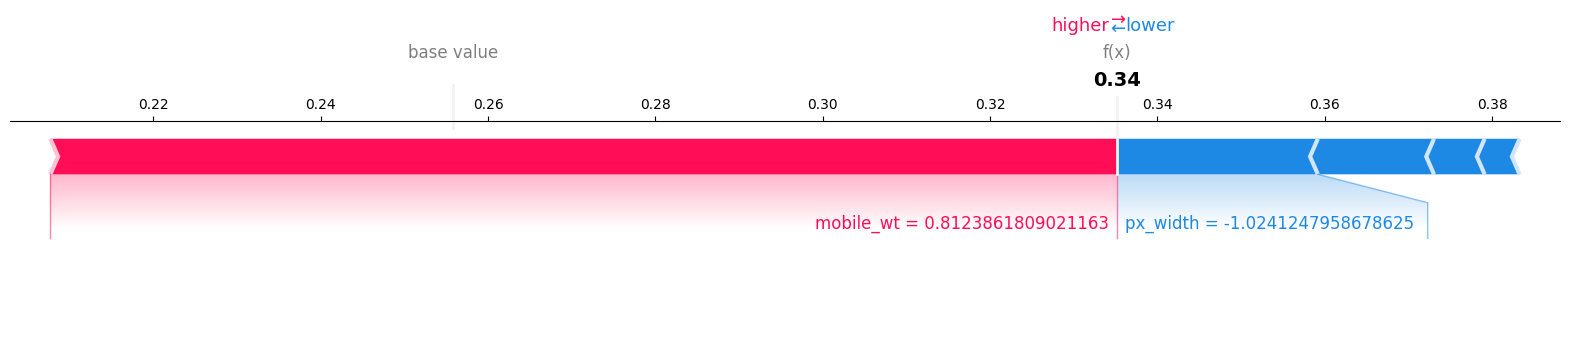

Force plot for class 2, instance 335:


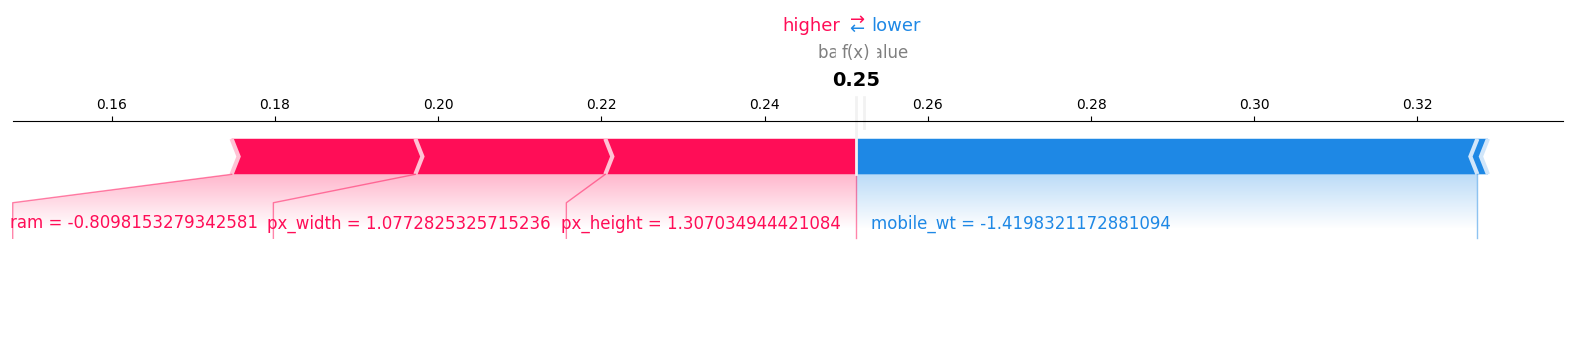

Force plot for class 2, instance 93:


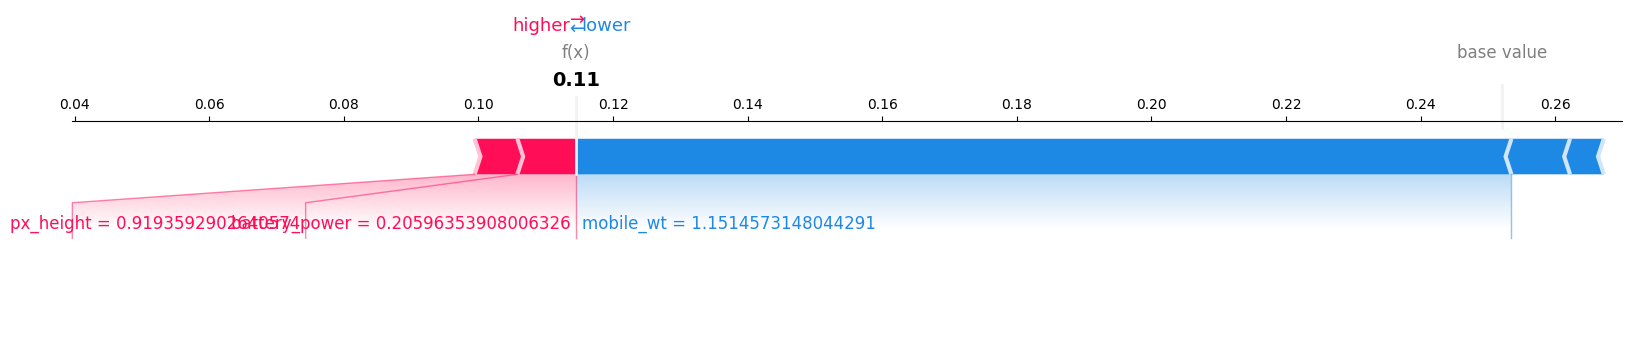

Force plot for class 2, instance 382:


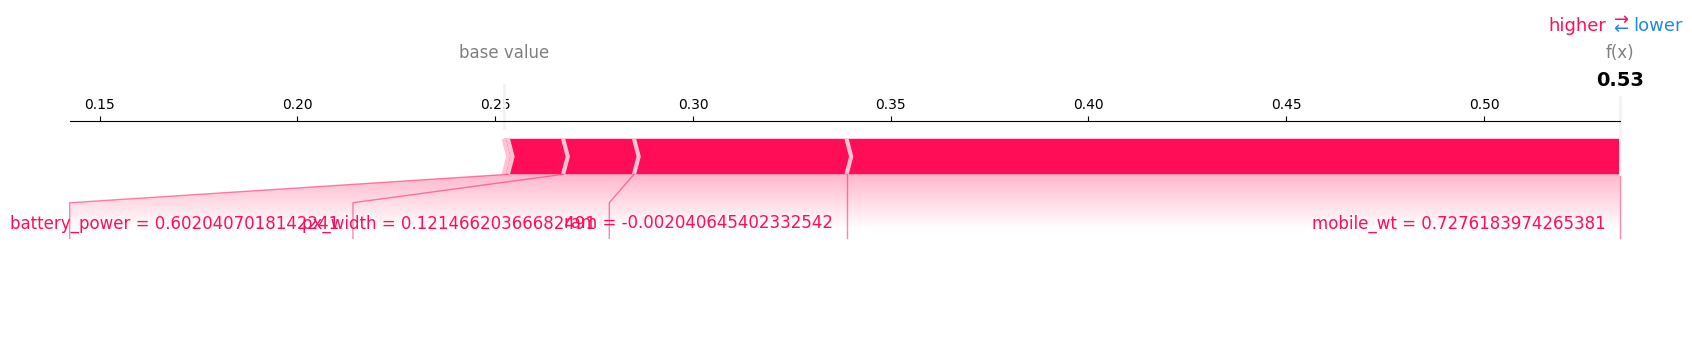

Force plot for class 2, instance 305:


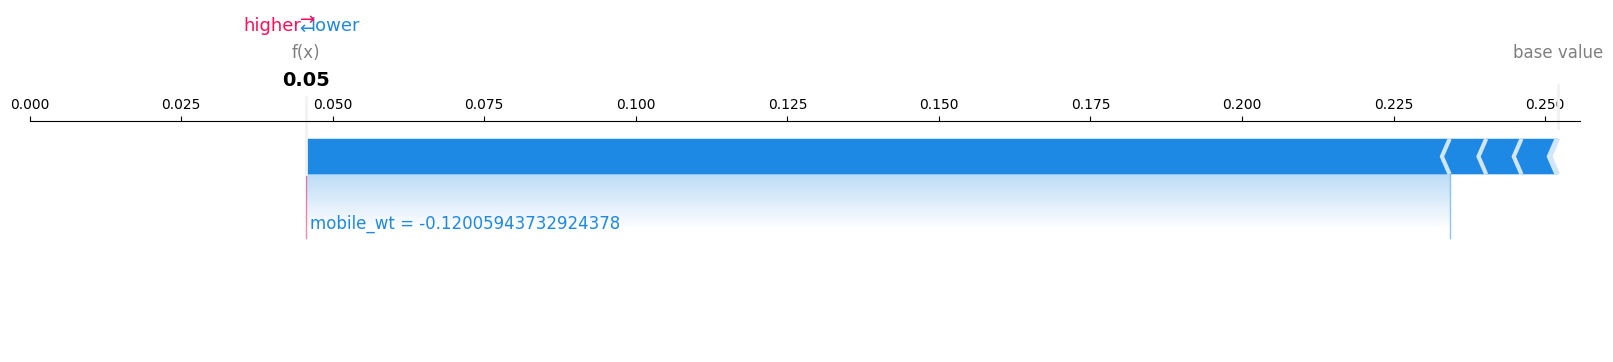

Force plot for class 2, instance 331:


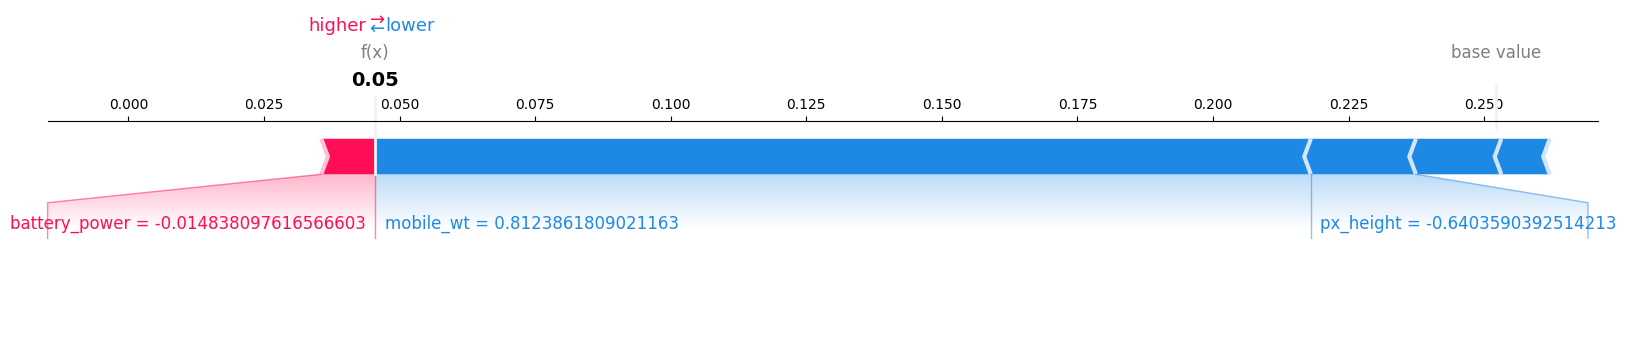

Force plot for class 3, instance 335:


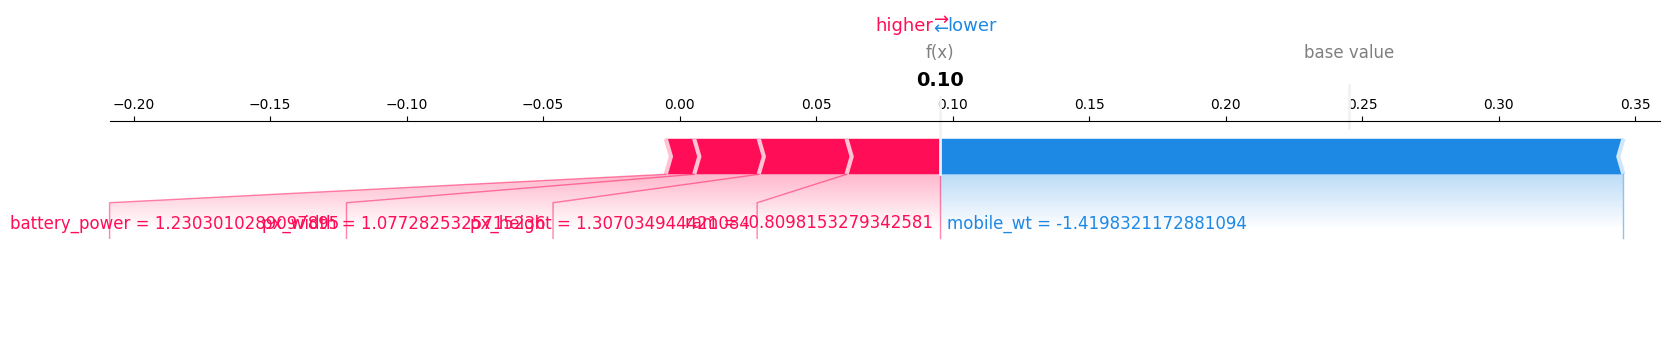

Force plot for class 3, instance 93:


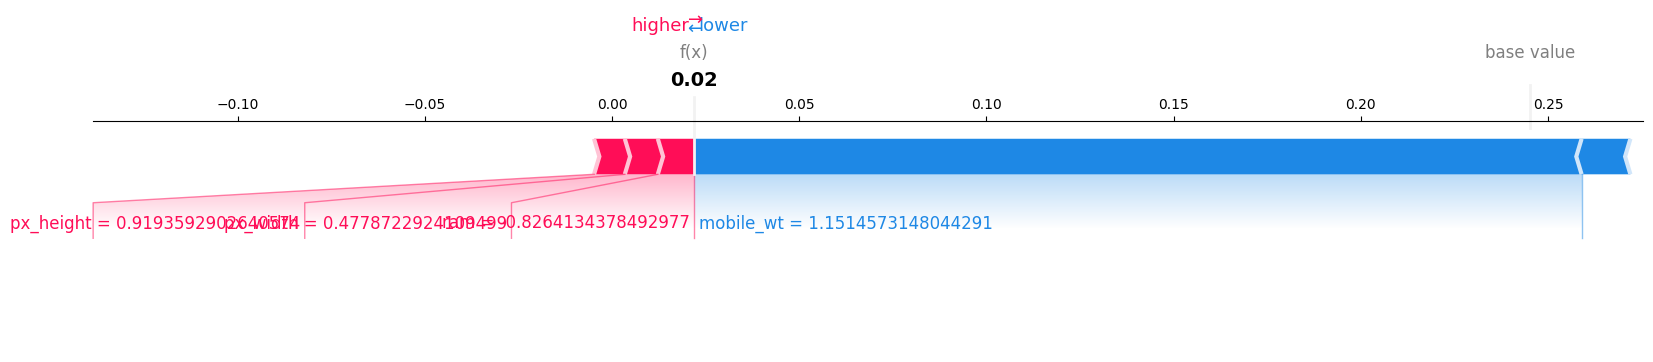

Force plot for class 3, instance 382:


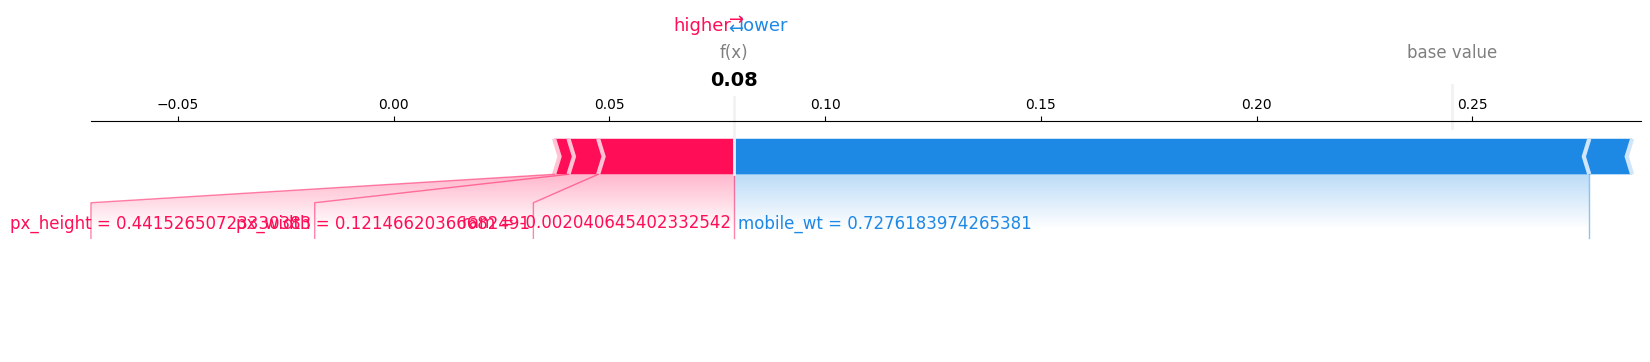

Force plot for class 3, instance 305:


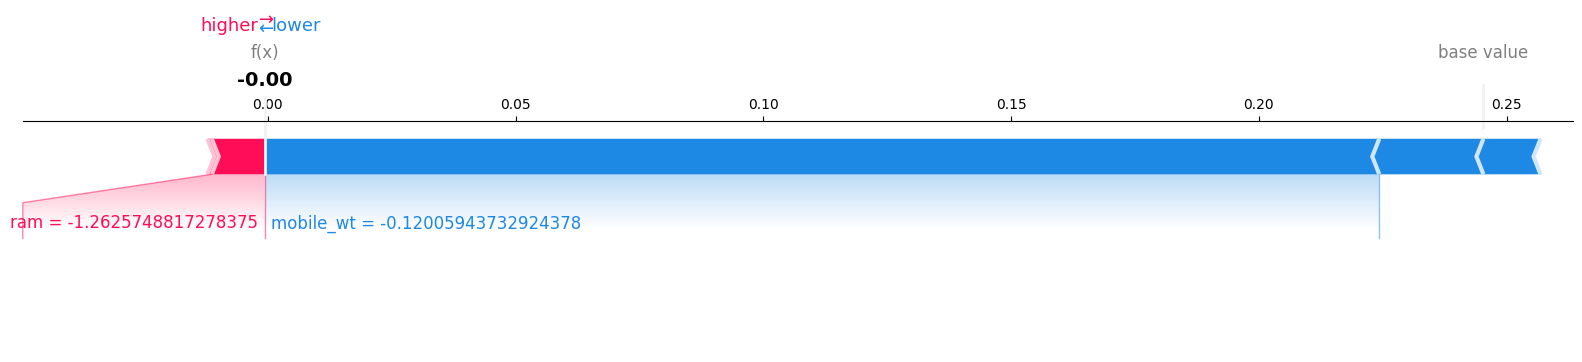

Force plot for class 3, instance 331:


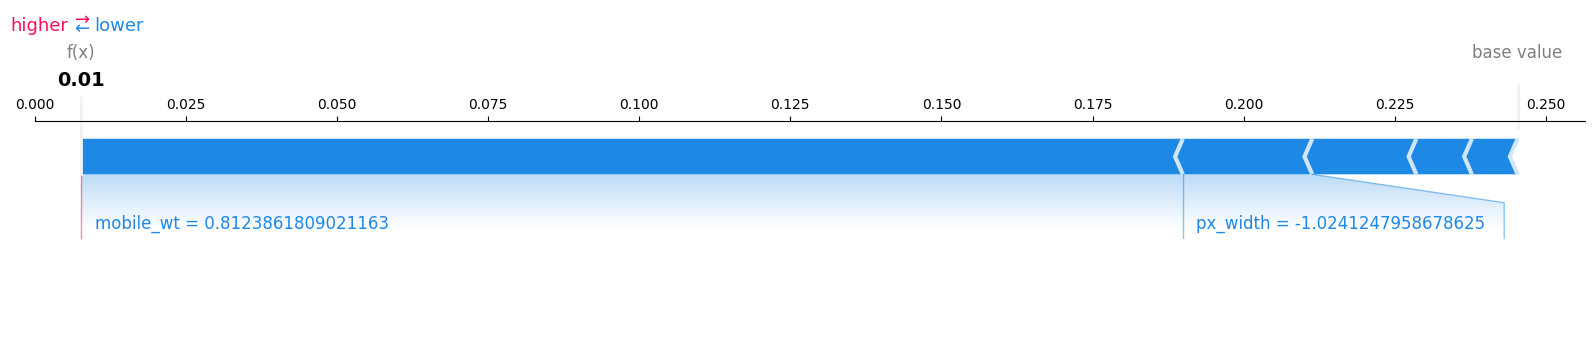

In [ ]:
selected_features = ["ram", "battery_power", "px_height", "px_width", "mobile_wt"]  # We can modify this list according to our needs

feature_mask = np.array([True if f in selected_features else False for f in X_test.columns])

# Number of instances to sample
num_samples = 5

# Generate random indices
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

# Plot the SHAP force plots for the sampled instances in X_test
for class_index in range(num_classes):
    shap_values_class = shap_values_array[:, :, class_index]
    for instance_index in random_indices:
        print(f"Force plot for class {class_index}, instance {instance_index}:")
        shap.force_plot(
            explainer.expected_value[class_index],  # Expected value for the class
            shap_values_class[instance_index][feature_mask],  # SHAP values for the selected features
            X_test.iloc[instance_index][selected_features],  # Instance data for the selected features
            feature_names=selected_features,  # Pass the selected feature names
            matplotlib=True,
        )

In the above Force Plot, for each instance in each class, we can see that there are either red or blue bars. The red bars means higher impact of a variable for that instance, while the blue bar means lower impact of a variable for that instance. The length of the bar signifies the level of impact the variable has on that instance, and we can also see the arrows, which if are left turned, represent negative impact and if right turned, represent positive impact.

So overall, we can see how an instance is being affected and in what way, and by which variable by looking at the force plots.

# Linear SHAP

Linear SHAP is designed for linear models, such as linear regression and logistic regression. In linear models, the coefficients represent the average contribution of each feature to the prediction across all instances. Linear SHAP assigns the contribution of each feature to a specific instance as the product of the feature value and the corresponding model coefficient. The Shapley values for a linear model are simply the feature values multiplied by the model's coefficients.

For linear models, the Shapley values are the product of the feature values and the corresponding model coefficients. 

The formula for Linear SHAP is as follows:

φ_i(x) = x_i * coef_i

Here, φ_i(x) represents the Shapley value for feature i, x_i is the value of feature i for the instance x, and coef_i is the corresponding coefficient for feature i in the linear model.

# Implementation of Linear SHAP

**Loading and Processing of the Dataset**

In [ ]:
!pip install --upgrade shap
!pip install scikit-learn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


# Load the dataset
url = "https://raw.githubusercontent.com/kmehul/Data-Science/main/Datasets/train.csv"
linear_data = pd.read_csv(url)
X, y = linear_data.drop("price_range", axis=1), linear_data["price_range"]

# Preprocess the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training a Logistic Regression Model**

In [ ]:
linear_model = LogisticRegression(random_state=42)
linear_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Checking the Most Important Features of our Dataset**

In [ ]:
# Get the absolute values of coefficients from the classifier
importances = np.abs(linear_model.coef_).mean(axis=0)

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Create a list of feature names
feature_names = list(X.columns)

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

Feature ranking:
1. feature 13 (7.177401): ram
2. feature 0 (1.815701): battery_power
3. feature 12 (1.040083): px_width
4. feature 11 (1.039912): px_height
5. feature 8 (0.284961): mobile_wt
6. feature 6 (0.123832): int_memory
7. feature 7 (0.092497): m_dep
8. feature 9 (0.082056): n_cores
9. feature 14 (0.081560): sc_h
10. feature 19 (0.080451): wifi
11. feature 3 (0.071222): dual_sim
12. feature 18 (0.048210): touch_screen
13. feature 17 (0.047399): three_g
14. feature 15 (0.046433): sc_w
15. feature 2 (0.042271): clock_speed
16. feature 5 (0.041964): four_g
17. feature 16 (0.039942): talk_time
18. feature 4 (0.034829): fc
19. feature 1 (0.026203): blue
20. feature 10 (0.023205): pc


We will do the shap analysis for the top 5 most important predictor variables in our Dataset.

**Implement Linear SHAP using the SHAP Library**

In [ ]:
# Create a Linear SHAP explainer and compute SHAP values for the test set
explainer = shap.LinearExplainer(linear_model, shap.sample(X_train, 100))
linear_shap_values = explainer.shap_values(X_test)

**Visualizing the Results using SHAP Plots**

Summary Plot

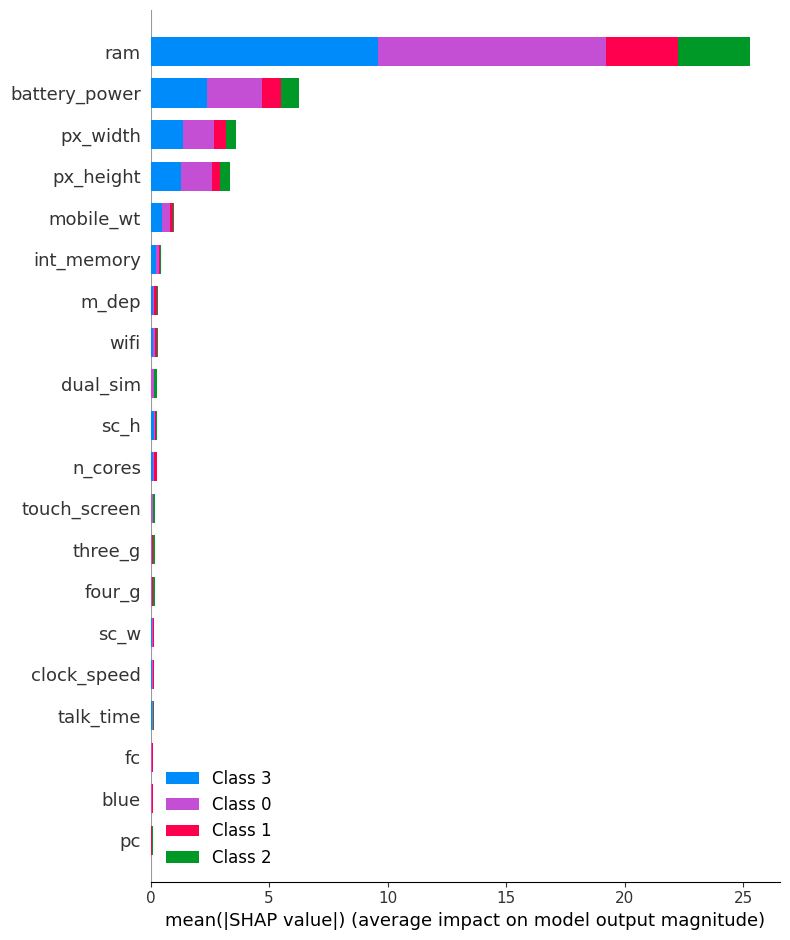

In [ ]:
# Summary plot
shap.summary_plot(linear_shap_values, X_test)

In the above SHAP Summary Plot, we can see that the most important predictor variables are showing a pattern/trend for the shap impact on the target variable class.

All the 5 variables, ram, battery_power, px_height, px_width, and mobile_wt have the highest shap impact for the class 2 of the target variable. After that they have the most impact on the class 1 of the target variable, and class 0, and class 3 after that, respectively.

Dependence Plot

Output class 0:


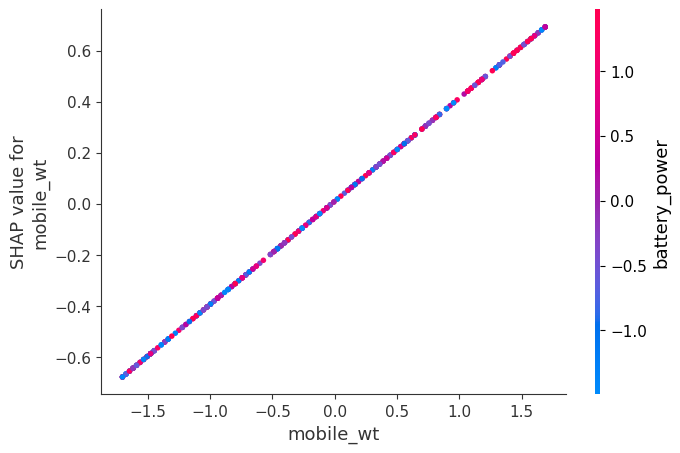

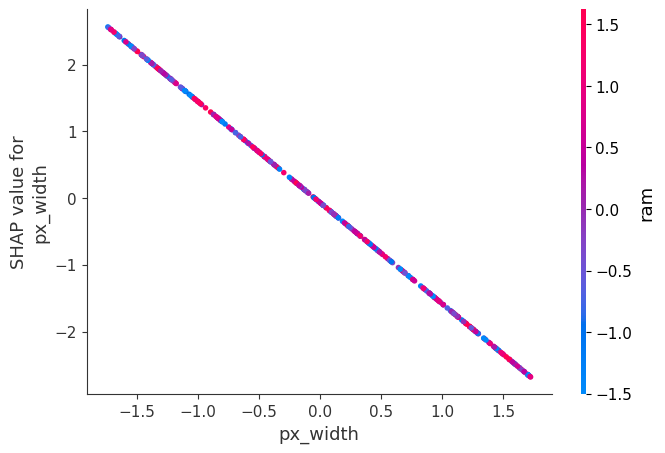

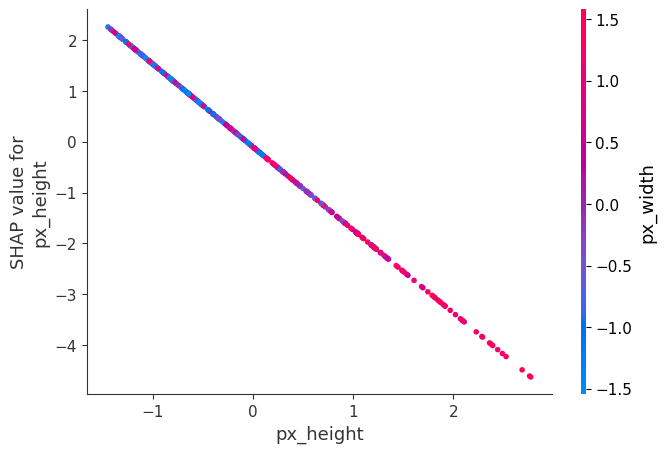

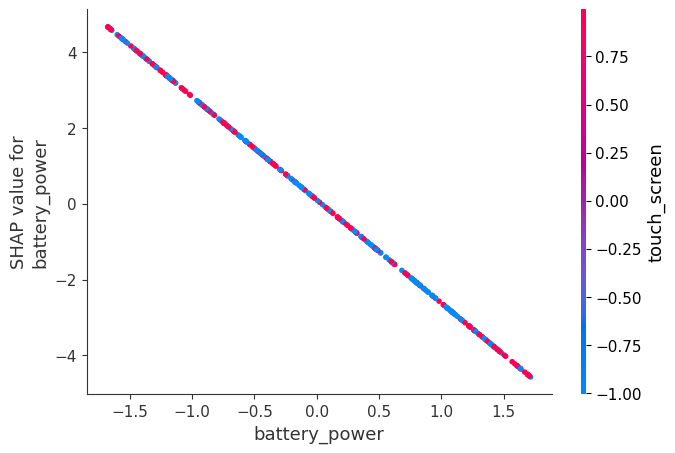

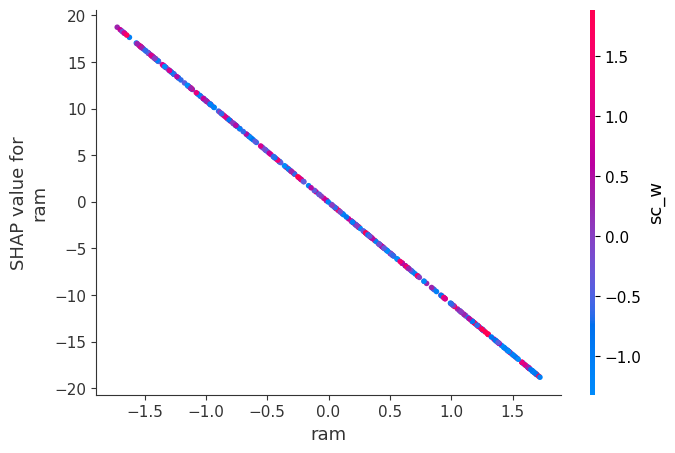

Output class 1:


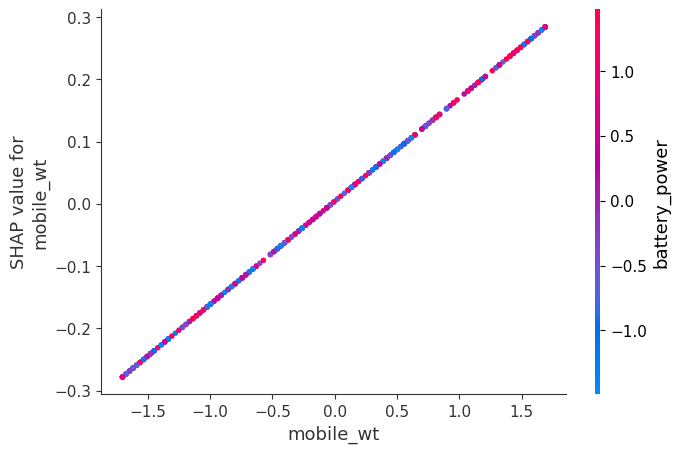

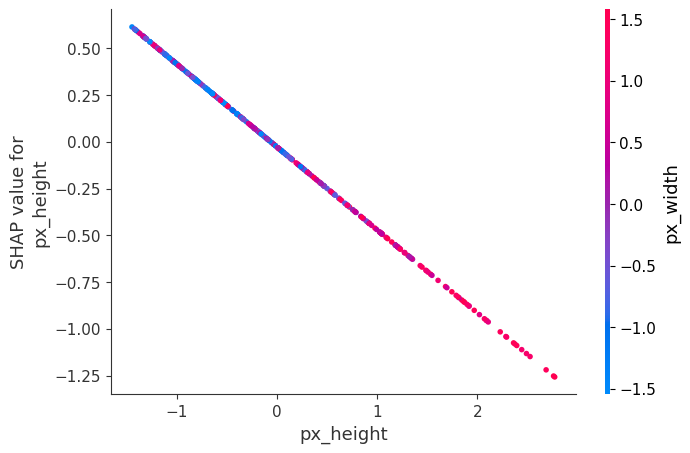

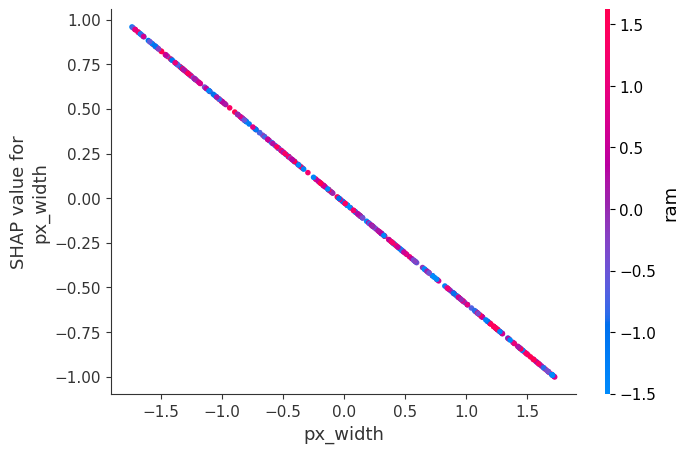

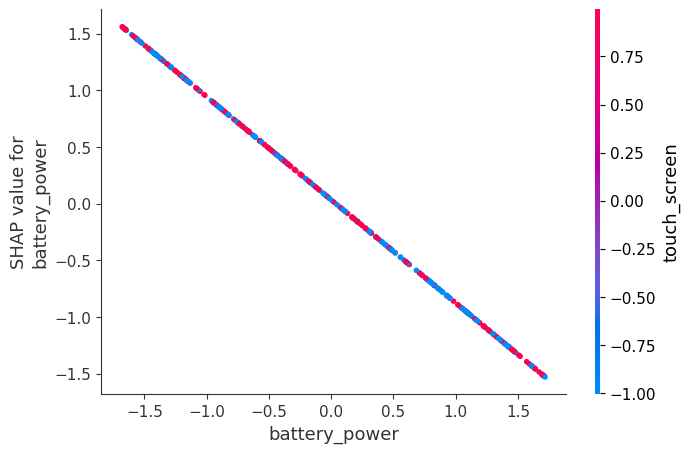

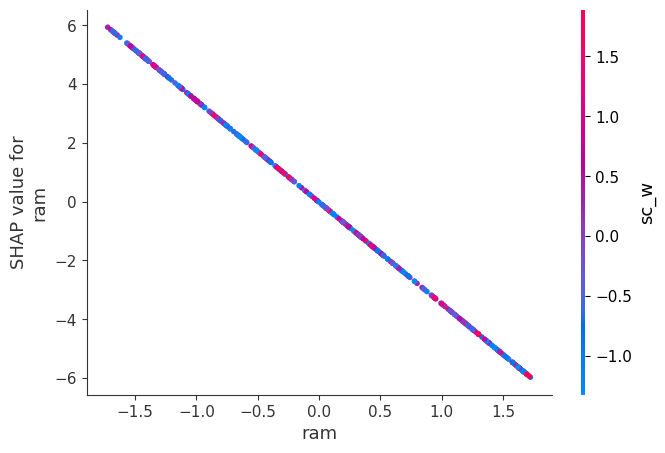

Output class 2:


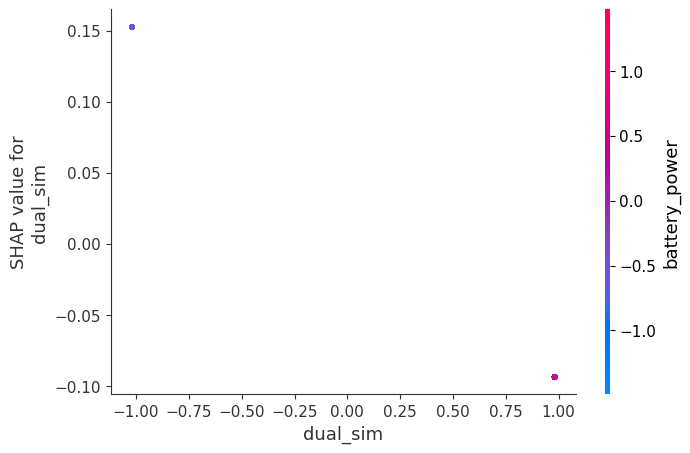

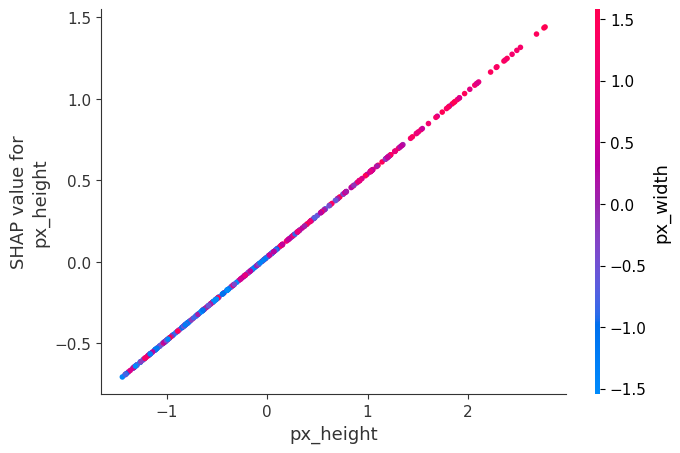

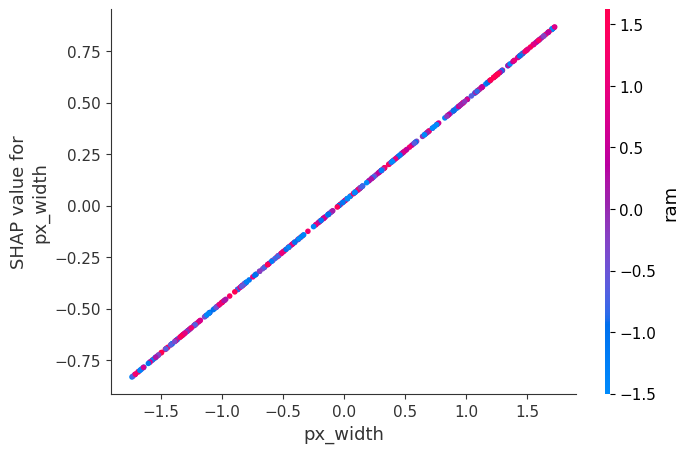

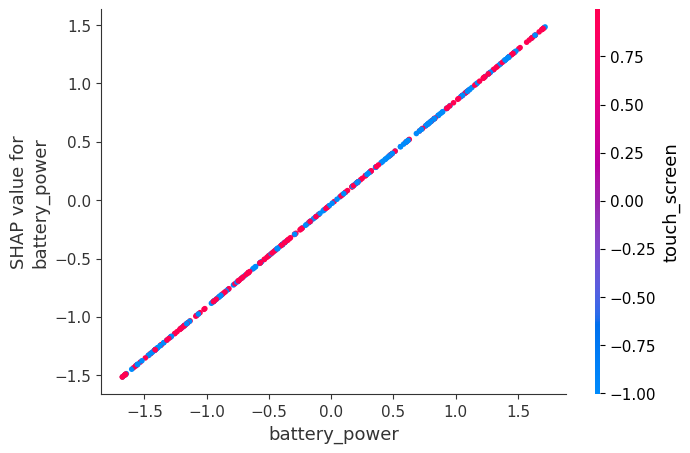

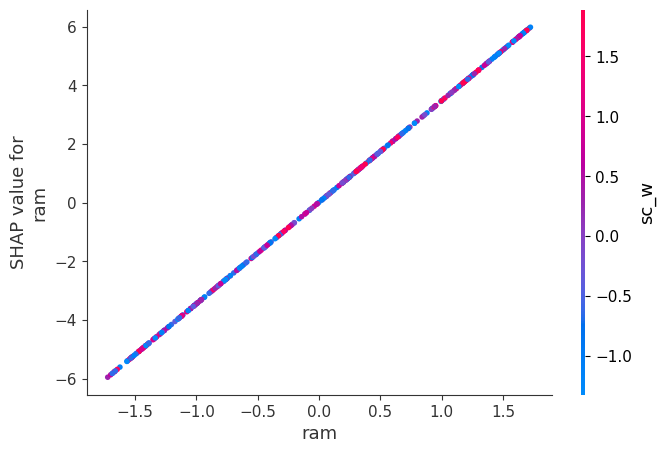

Output class 3:


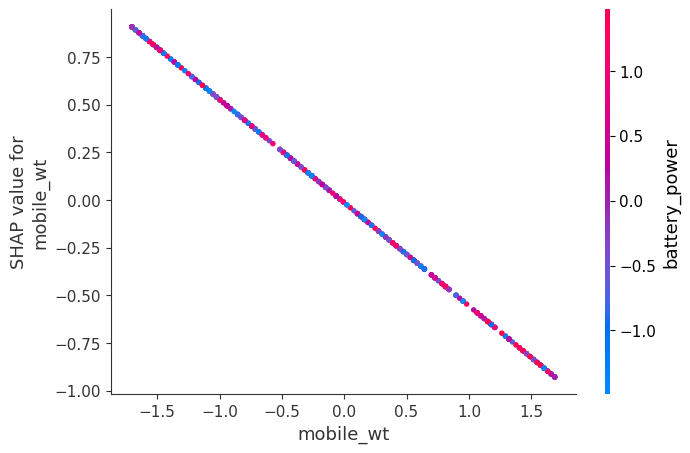

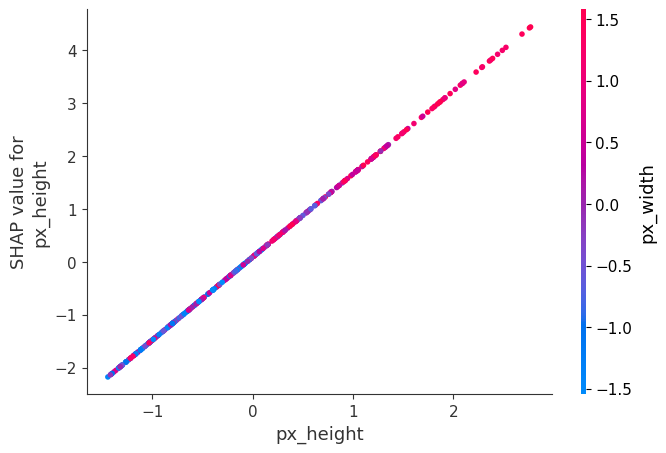

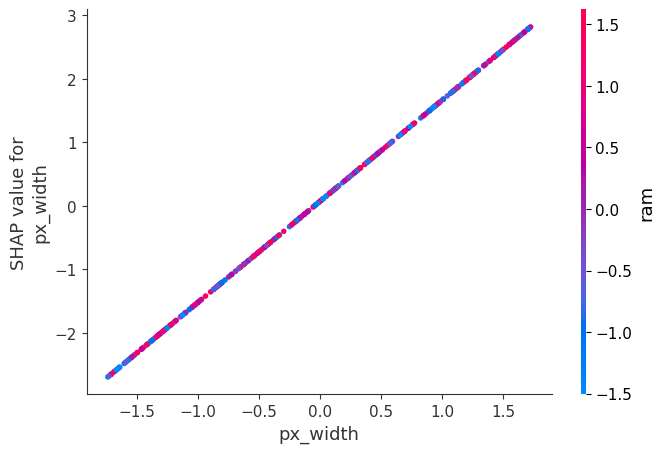

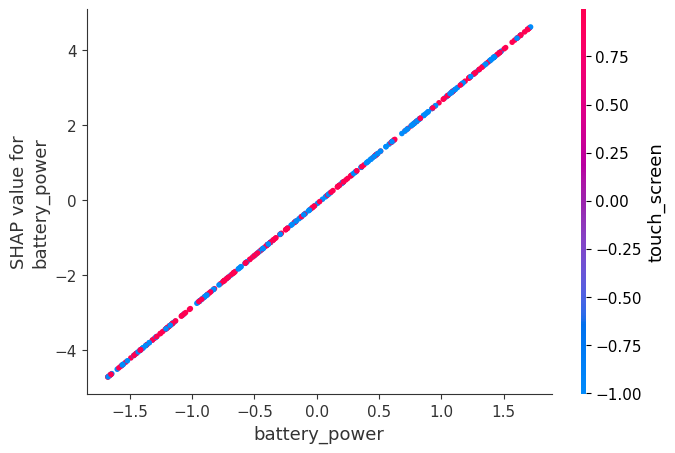

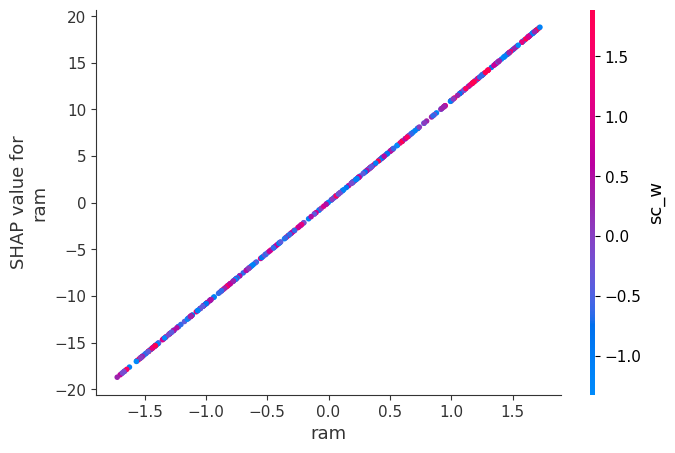

In [ ]:
top_n = 5
top_n_feature_indices_per_class = []

for class_idx in range(len(linear_shap_values)):
    # Get the mean absolute SHAP values for each feature for the current output class
    mean_abs_shap_values = np.mean(np.abs(linear_shap_values[class_idx]), axis=0)

    # Get the indices of the top 3 features with the highest mean absolute SHAP values
    top_n_feature_indices = np.argsort(mean_abs_shap_values)[-top_n:]
    top_n_feature_indices_per_class.append(top_n_feature_indices)

for class_idx, top_n_feature_indices in enumerate(top_n_feature_indices_per_class):
    print(f"Output class {class_idx}:")
    for feature_index in top_n_feature_indices:
        shap.dependence_plot(feature_index, linear_shap_values[class_idx], X_test)

For the Linear Model based SHAP Dependence Plot, we can only say if the relationship of two variables is proportional or inversely proportional for the higher class of the target variable. Thatis, if the relationship is proportional, it will increase the probability of occurence of that class, and decrease the probability if the relationship is inversely proportional.

The following is the interpretation of the above dependence plot:

* For Target class 0: We can see that the relationship between mobile_wt and battery power is proportional, i.e., it is a positive relationship, which in turn will increase the probability of this class. For px_width and ram, the relationship is inversely proportional. For px_height and px_width, the relationship is inversely proportional. For battery_power and touch_screen as well, the relationship is inversely proportional. And finally, the relationship between ram and sc_w is also inversely proportional.

* For Target class 1: The relationship between mobile_wt and battery_power is proportional, while all the other relationhips are inversely proportional.

* For Target class 2: There is no relationship between dual_sim and battery_power, while all the other relationships are proportional.

* For Target class 3: In this class the relationship between mobile_wt and battery power is inversely proportional, which means it will decrease the probability of this class. While all the other relationships are proportional, which means that they will increase the probility of this class.


Force Plot

Output class 0:
Instance 1860:


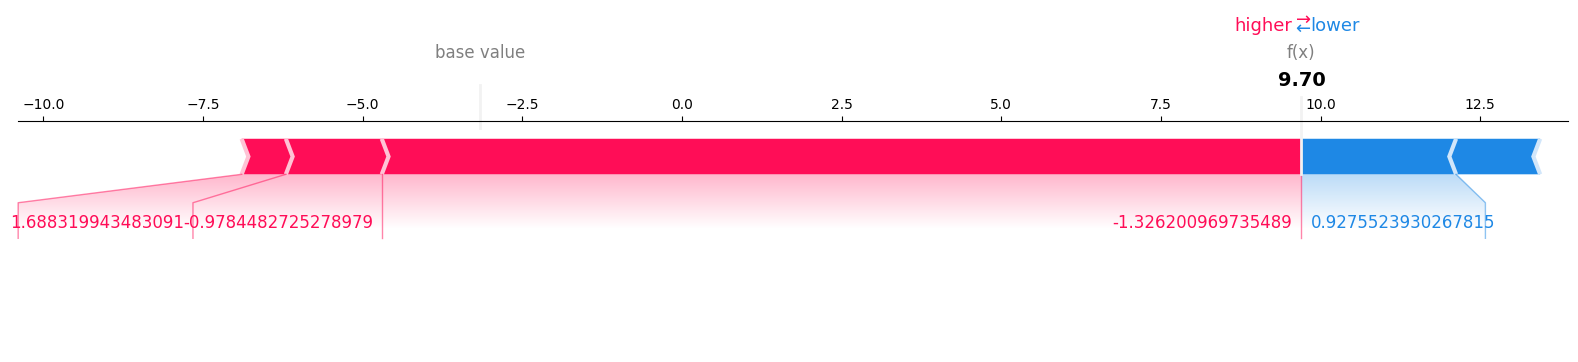

Instance 353:


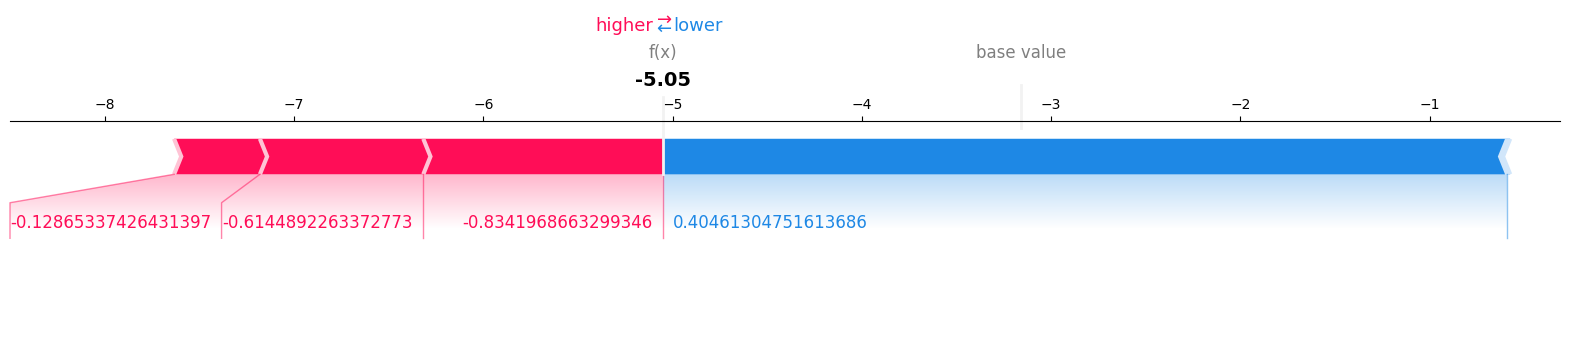

Instance 1333:


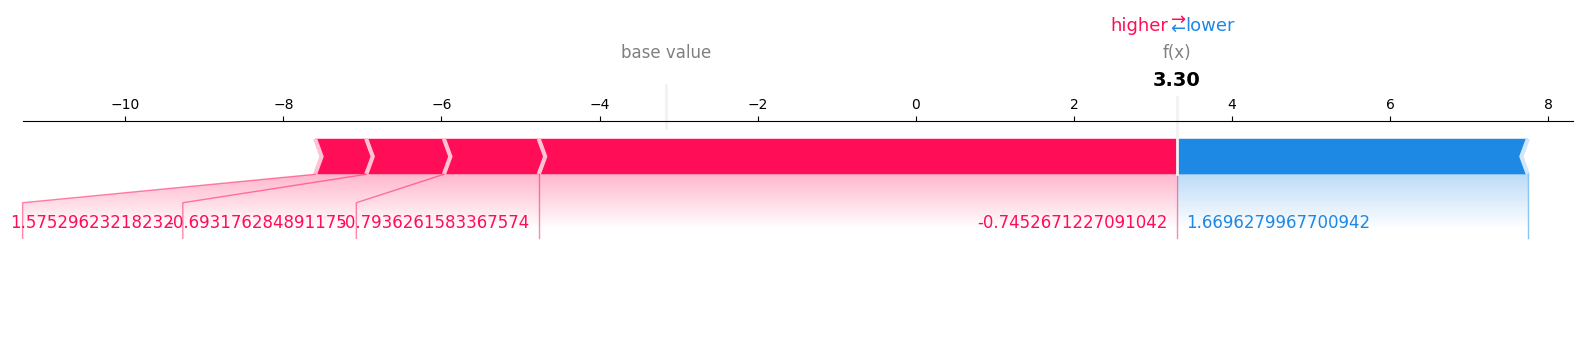

Instance 905:


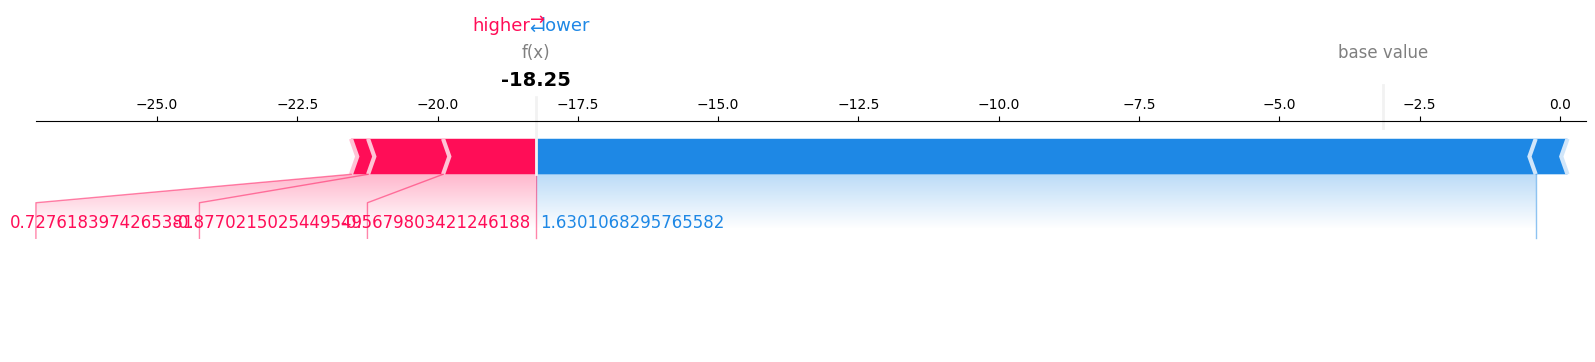

Instance 1289:


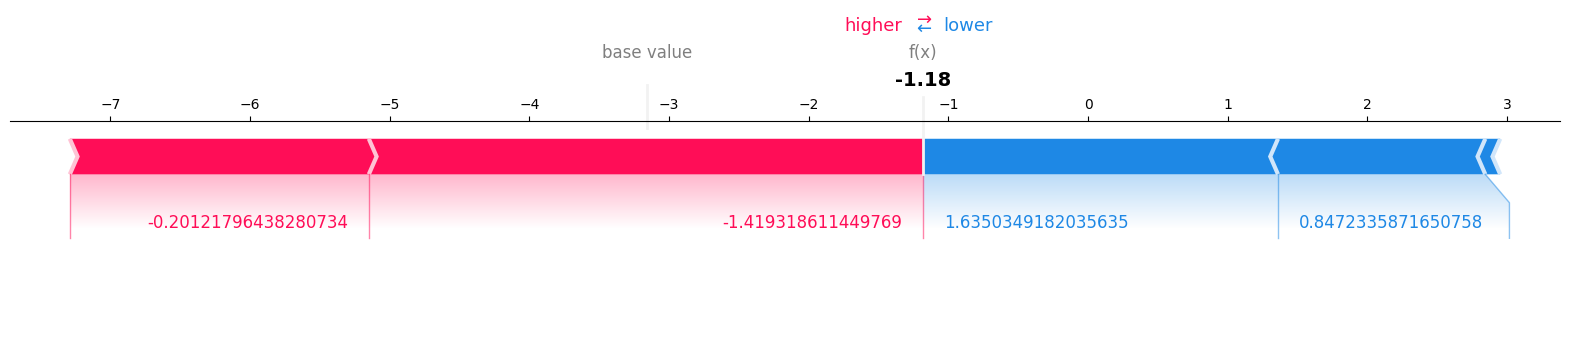

Output class 1:
Instance 1860:


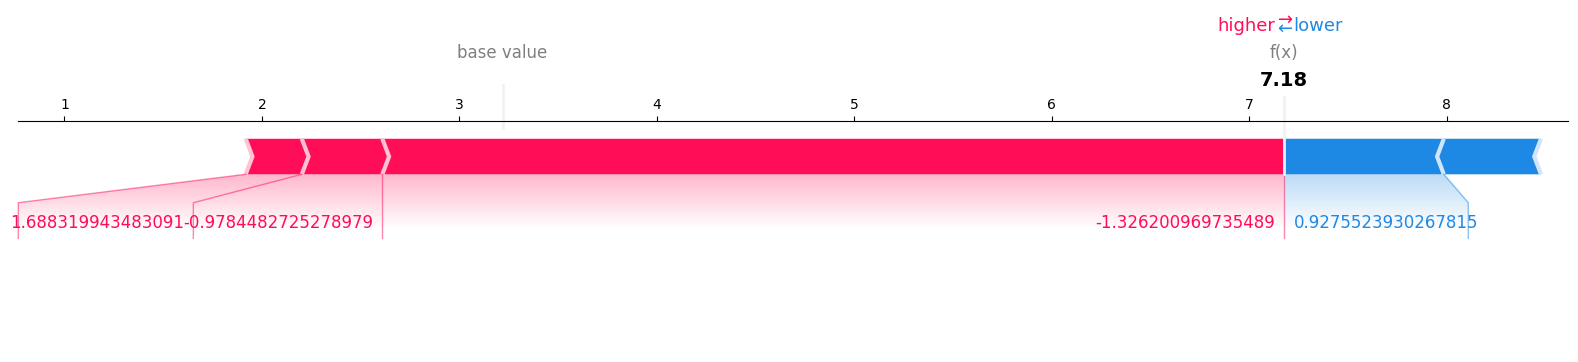

Instance 353:


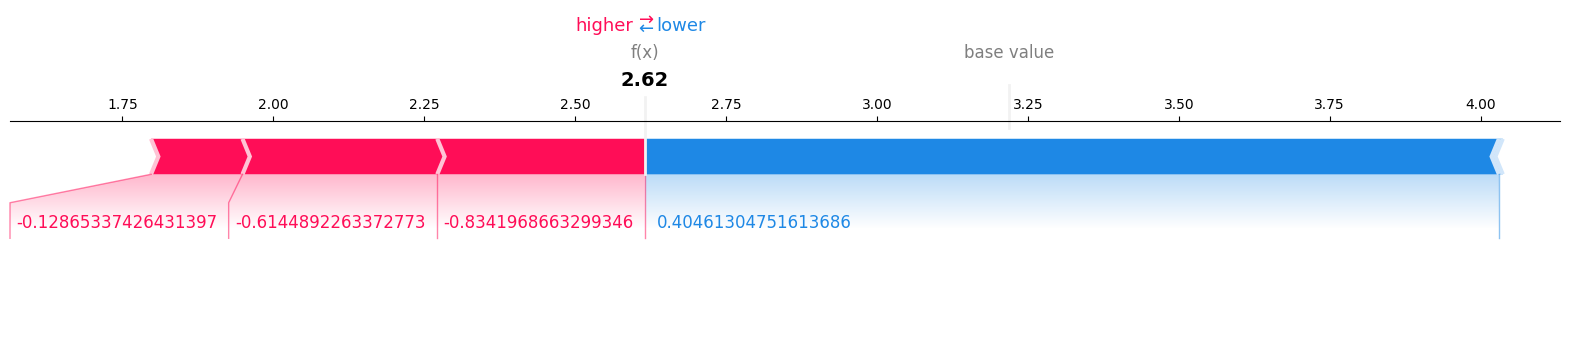

Instance 1333:


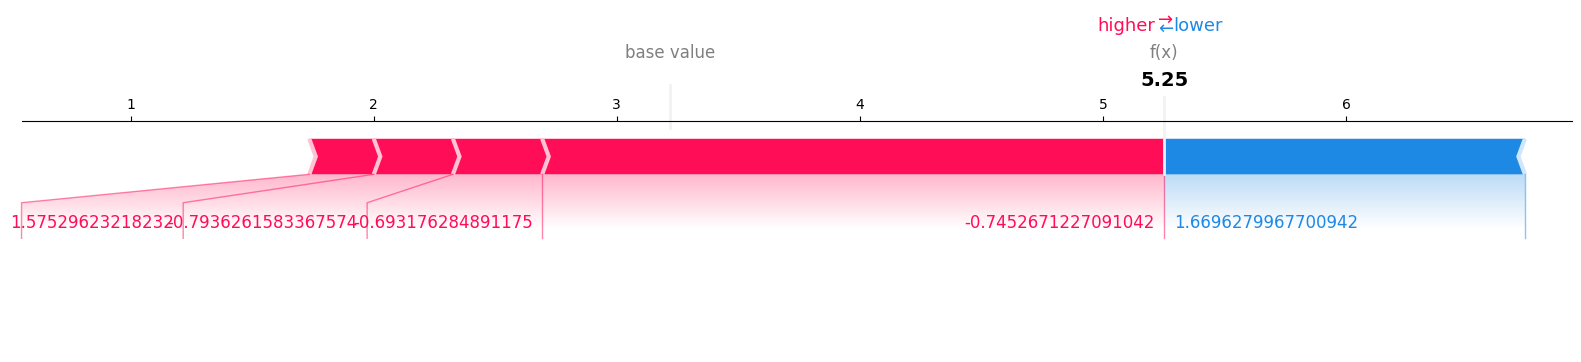

Instance 905:


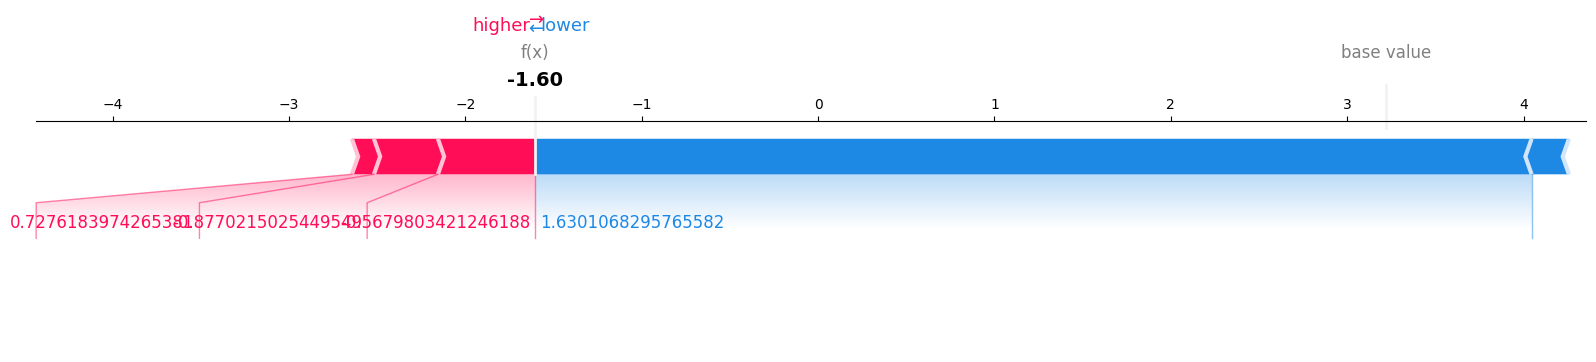

Instance 1289:


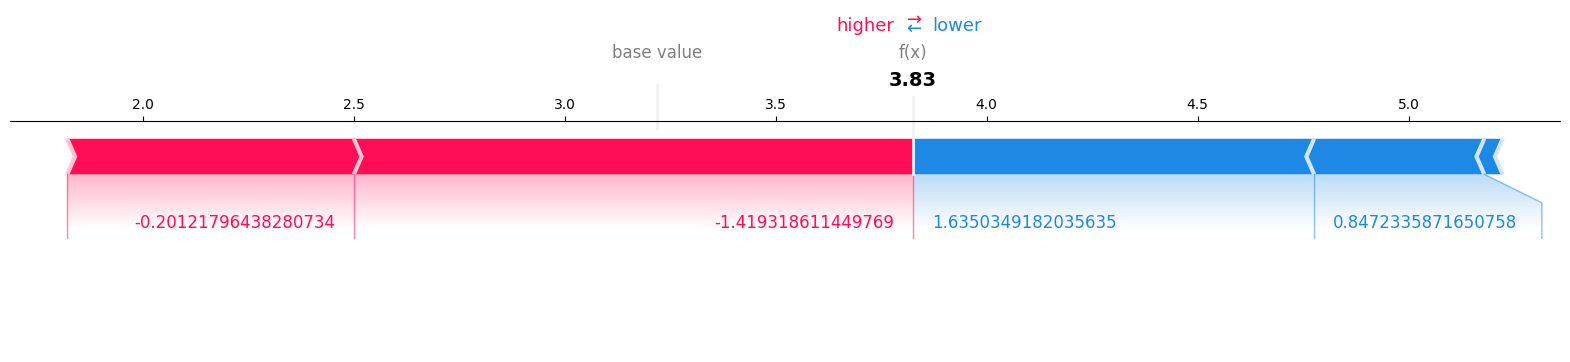

Output class 2:
Instance 1860:


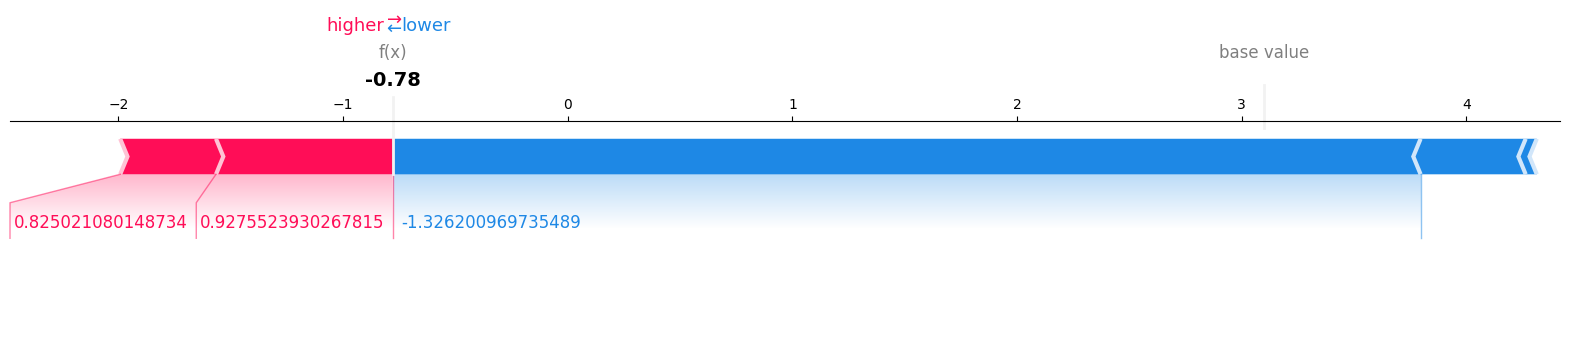

Instance 353:


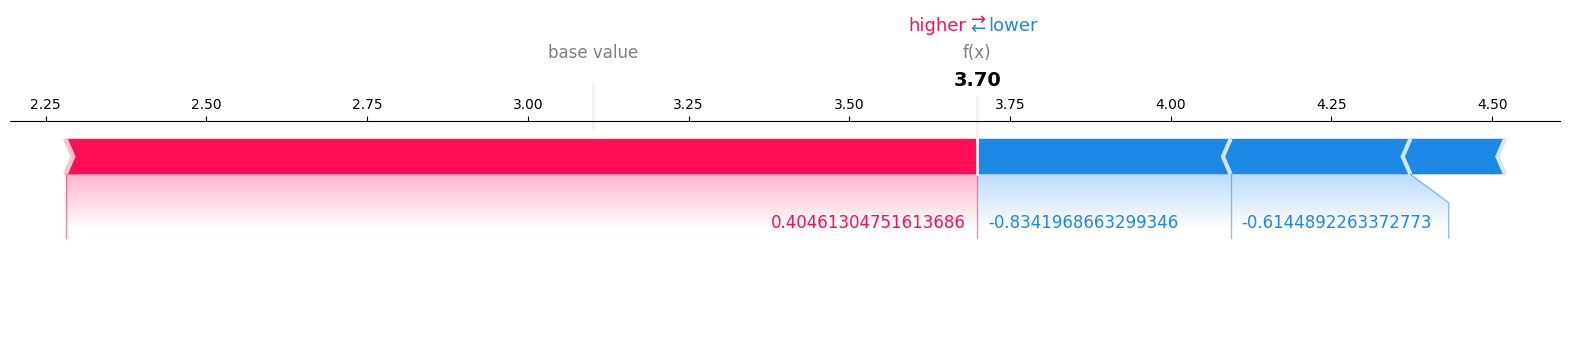

Instance 1333:


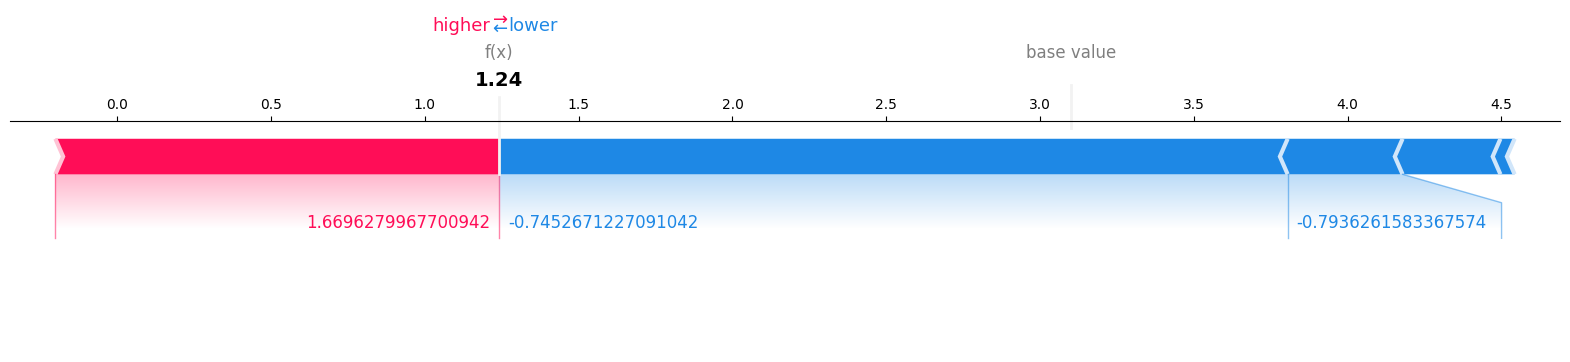

Instance 905:


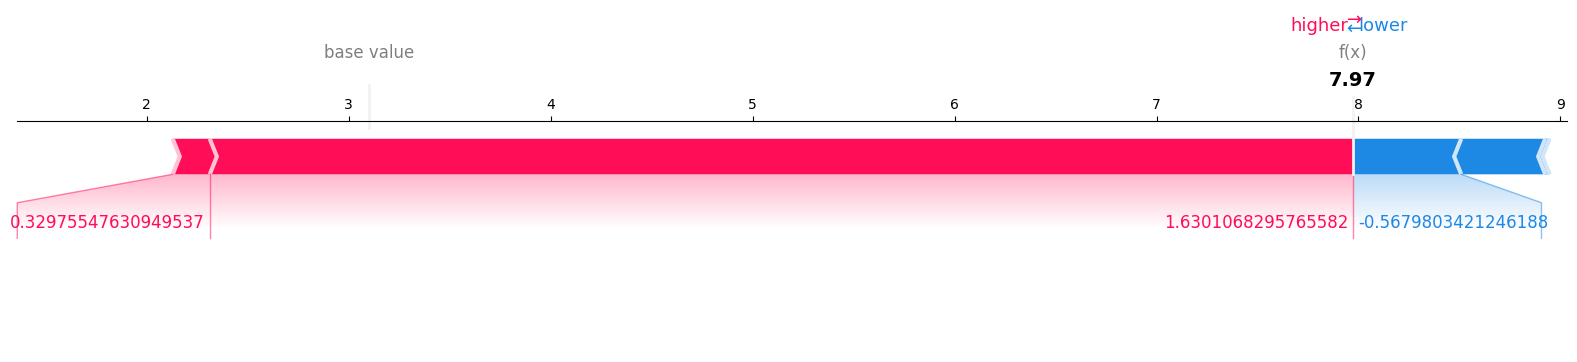

Instance 1289:


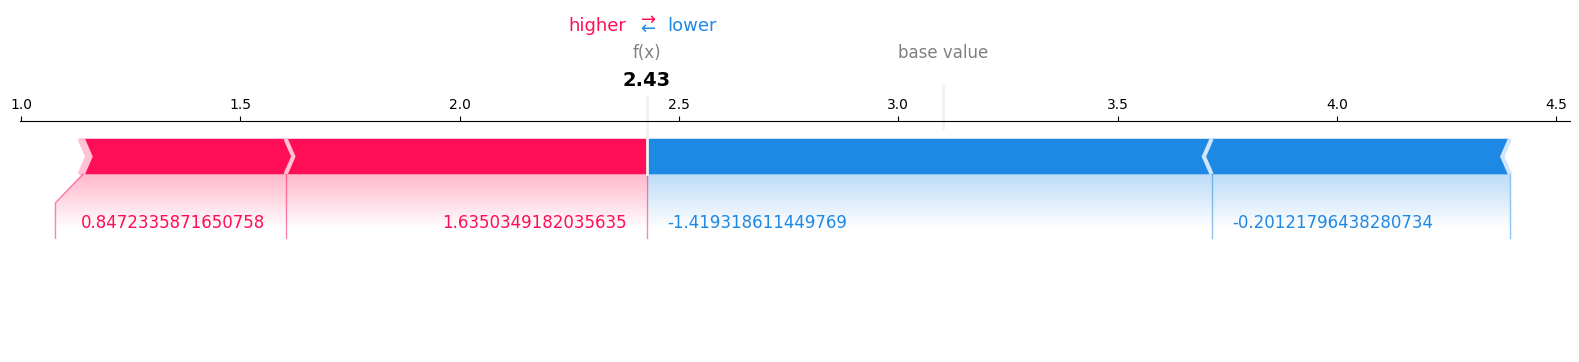

Output class 3:
Instance 1860:


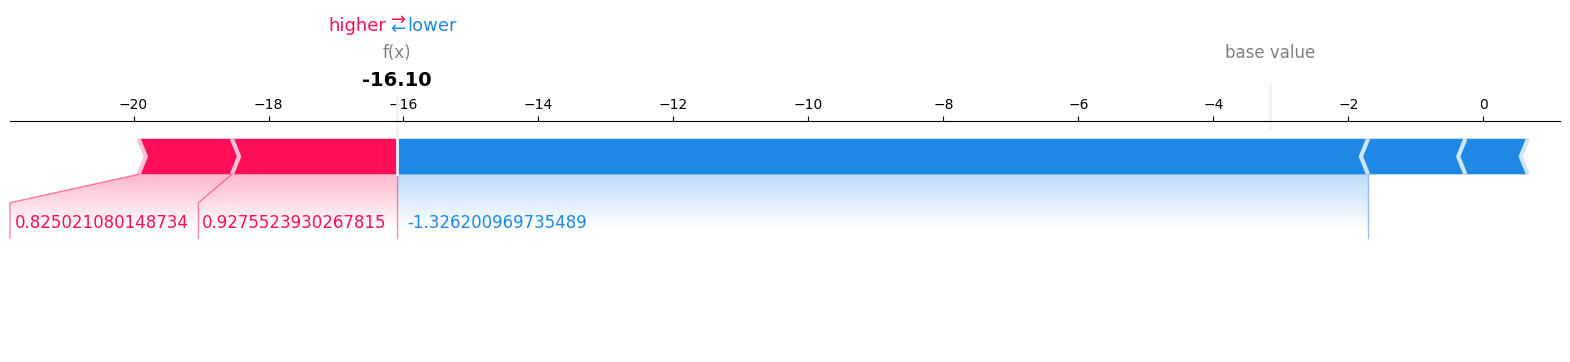

Instance 353:


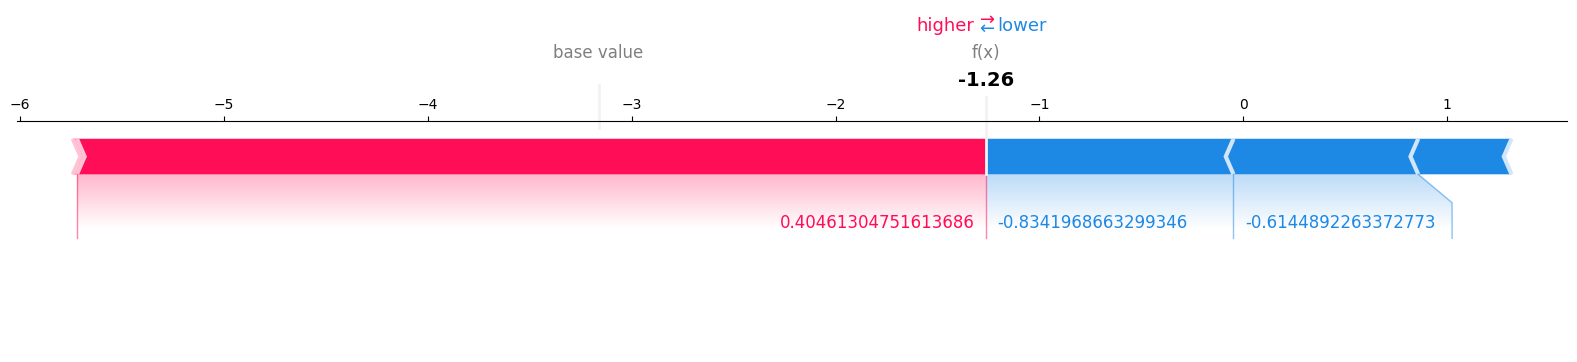

Instance 1333:


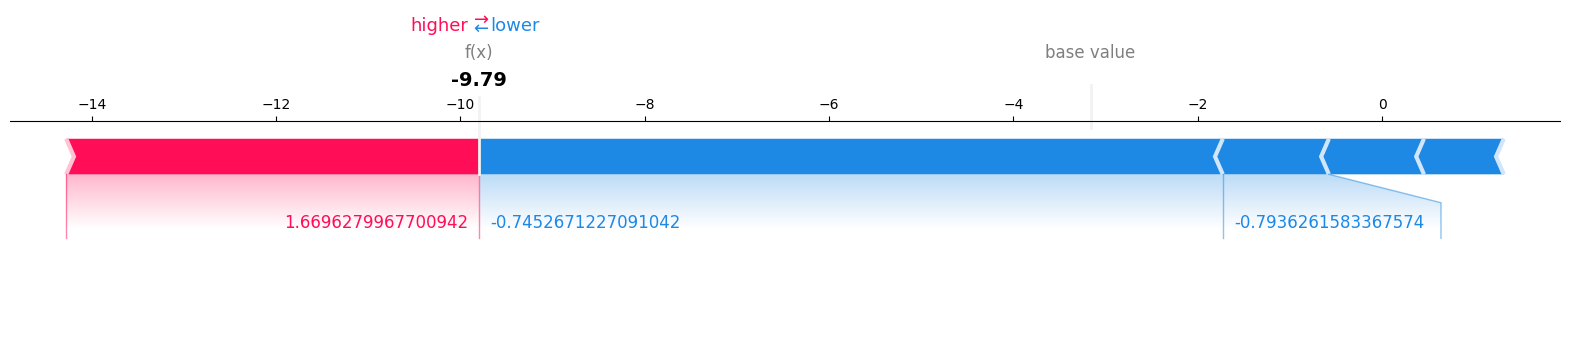

Instance 905:


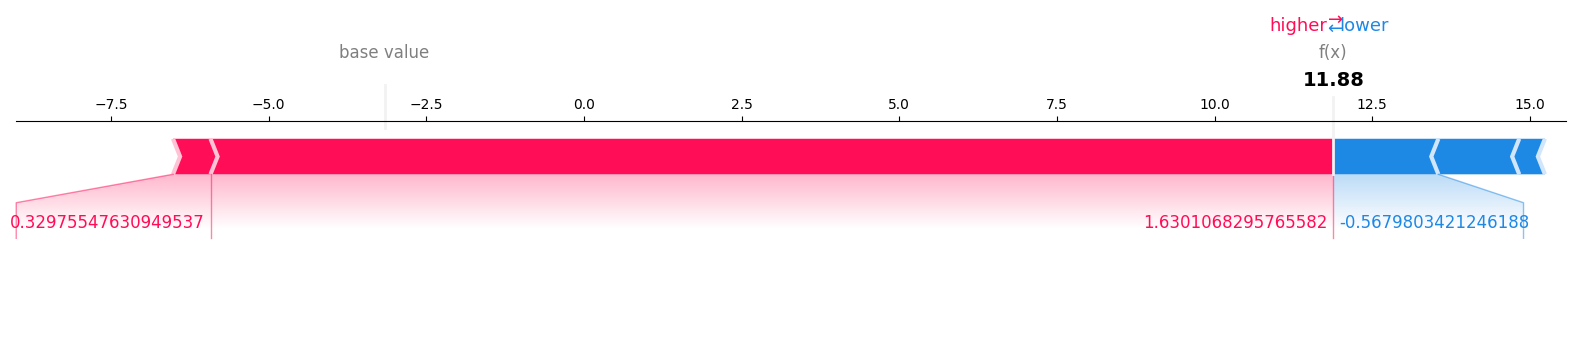

Instance 1289:


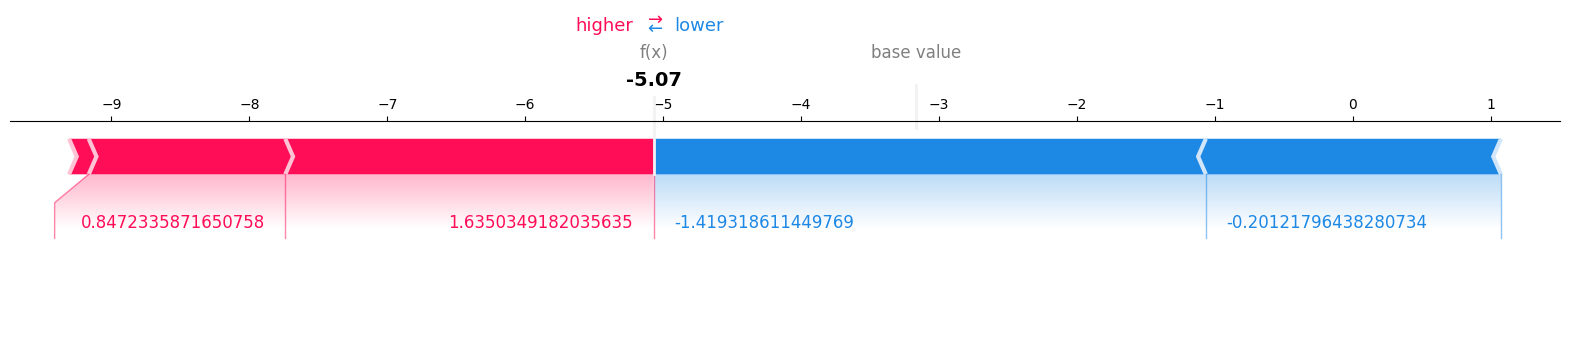

In [ ]:
# Initialize the JavaScript environment
shap.initjs()

selected_predictor_indices = [13, 0, 11, 12, 8]  # Can be replaced with the desired indices

# Selecting 5 instances from the dataset
num_instances = 5
selected_instances = X_test.iloc[:num_instances, selected_predictor_indices]

# Computing the SHAP values for the selected instances and predictor variables
selected_shap_values = []

for class_idx in range(len(linear_shap_values)):
    selected_shap_values_class = linear_shap_values[class_idx][:num_instances][:, selected_predictor_indices]
    selected_shap_values.append(selected_shap_values_class)

# Creating force plots for the selected predictor variables and instances for each output class
for class_idx, shap_values_class in enumerate(selected_shap_values):
    print(f"Output class {class_idx}:")
    for instance_idx, (instance_shap_values, instance) in enumerate(zip(shap_values_class, selected_instances.index)):
        print(f"Instance {instance}:")
        fig = shap.force_plot(
            explainer.expected_value[class_idx],
            instance_shap_values,
            selected_instances.iloc[instance_idx].values,
            matplotlib=True,
            show=False,
        )
        plt.show()

In the above Force Plot, for each instance in each class, we can see that there are either red or blue bars. The red bars means higher impact of a variable for that instance, while the blue bar means lower impact of a variable for that instance. The length of the bar signifies the level of impact the variable has on that instance, and we can also see the arrows, which if are left turned, represent negative impact and if right turned, represent positive impact.

So overall, we can see how an instance is being affected and in what way, and by which variable by looking at the force plots.

# Conclusion

* In this notebook, we used SHAP Analysis to analyze a mobile price classification dataset, and identified several important features that contribute to the final predictions, including RAM, and battery power.

* We also used several visualizations, including summary plots, dependence plots, and force plots, to better understand the relationships between features and predictions.

* The results of our analysis provide valuable insights for improving the mobile price classification model, and demonstrate the usefulness of Shapley values for interpreting and improving machine learning models.

* In summary, Shapley values are a valuable tool for interpreting machine learning models and building trust in their predictions, and should be considered as an important part of any machine learning workflow.

# References

* https://christophm.github.io/interpretable-ml-book/shap.html

* https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454

* https://medium.com/mlearning-ai/shap-force-plots-for-classification-d30be430e195

* https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d